In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
# Importing dataset
data = pd.read_csv('wine.csv')
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1  1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2  1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3  1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4  1     13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0  0.28           2.29             5.64   1.04  3.92      1065     
1  0.26           1.28             4.38   1.05  3.40      1050     
2  0.30           2.81             5.68   1.03  3.17      1185     
3  0.24           2.18             7.80   0.86  3.45      1480     
4  0.39           1.82             4.32   1.04  2.93      735

In [5]:
data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [6]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [7]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [8]:
data['ID'] = range(1, 179, 1)
data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1    1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2    1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3    1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4    1     13.24    2.59   2.87  21.0        118        2.80     2.69         
..  ..       ...     ...    ...   ...        ...         ...      ...         
173  3     13.71    5.65   2.45  20.5        95         1.68     0.61         
174  3     13.40    3.91   2.48  23.0        102        1.80     0.75         
175  3     13.27    4.28   2.26  20.0        120        1.59     0.69         
176  3     13.17    2.59   2.37  20.0        120        1.65     0.68         
177  3     14.13    4.10   2.74  24.5        96         2.05     0.76         

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline   ID  
0    0.28           2.29             5.64   1.04  3.92      1065     1    
1    0.26           1.28             4.38   1.05  3.40      1050     2    
2    0.30           2.81             5.68   1.03  3.17      1185     3    
3    0.24           2.18             7.80   0.86  3.45      1480     4    
4    0.39           1.82             4.32   1.04  2.93      735      5    
..    ...            ...              ...    ...   ...      ...     ..    
173  0.52           1.06             7.70   0.64  1.74      740      174  
174  0.43           1.41             7.30   0.70  1.56      750      175  
175  0.43           1.35             10.20  0.59  1.56      835      176  
176  0.53           1.46             9.30   0.60  1.62      840      177  
177  0.56           1.35             9.20   0.61  1.60      560      178  

[178 rows x 15 columns]

In [9]:
df = data.drop('Type',axis=1)

In [10]:
df.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean   13.000618   2.336348    2.366517    19.494944   99.741573   2.295112     
std    0.811827    1.117146    0.274344    3.339564    14.282484   0.625851     
min    11.030000   0.740000    1.360000    10.600000   70.000000   0.980000     
25%    12.362500   1.602500    2.210000    17.200000   88.000000   1.742500     
50%    13.050000   1.865000    2.360000    19.500000   98.000000   2.355000     
75%    13.677500   3.082500    2.557500    21.500000   107.000000  2.800000     
max    14.830000   5.800000    3.230000    30.000000   162.000000  3.880000     

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean   2.029270    0.361854       1.590899         5.058090    0.957449     
std    0.998859    0.124453       0.572359         2.318286    0.228572     
min    0.340000    0.130000       0.410000         1.280000    0.480000     
25%    1.205000    0.270000       1.250000         3.220000    0.782500     
50%    2.135000    0.340000       1.555000         4.690000    0.965000     
75%    2.875000    0.437500       1.950000         6.200000    1.120000     
max    5.080000    0.660000       3.580000         13.000000   1.710000     

         Dilution      Proline          ID  
count  178.000000  178.000000   178.000000  
mean   2.611685    746.893258   89.500000   
std    0.709990    314.907474   51.528309   
min    1.270000    278.000000   1.000000    
25%    1.937500    500.500000   45.250000   
50%    2.780000    673.500000   89.500000   
75%    3.170000    985.000000   133.750000  
max    4.000000    1680.000000  178.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [12]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = df.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    14
dtype: int64 

Null Percentage for Columns:

 0.0    14
dtype: int64


In [13]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    178
dtype: int64 

Null Percentage for Rows:

 0.0    178
dtype: int64


In [14]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
df.duplicated().sum()

0

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline, ID]
Index: []

In [16]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

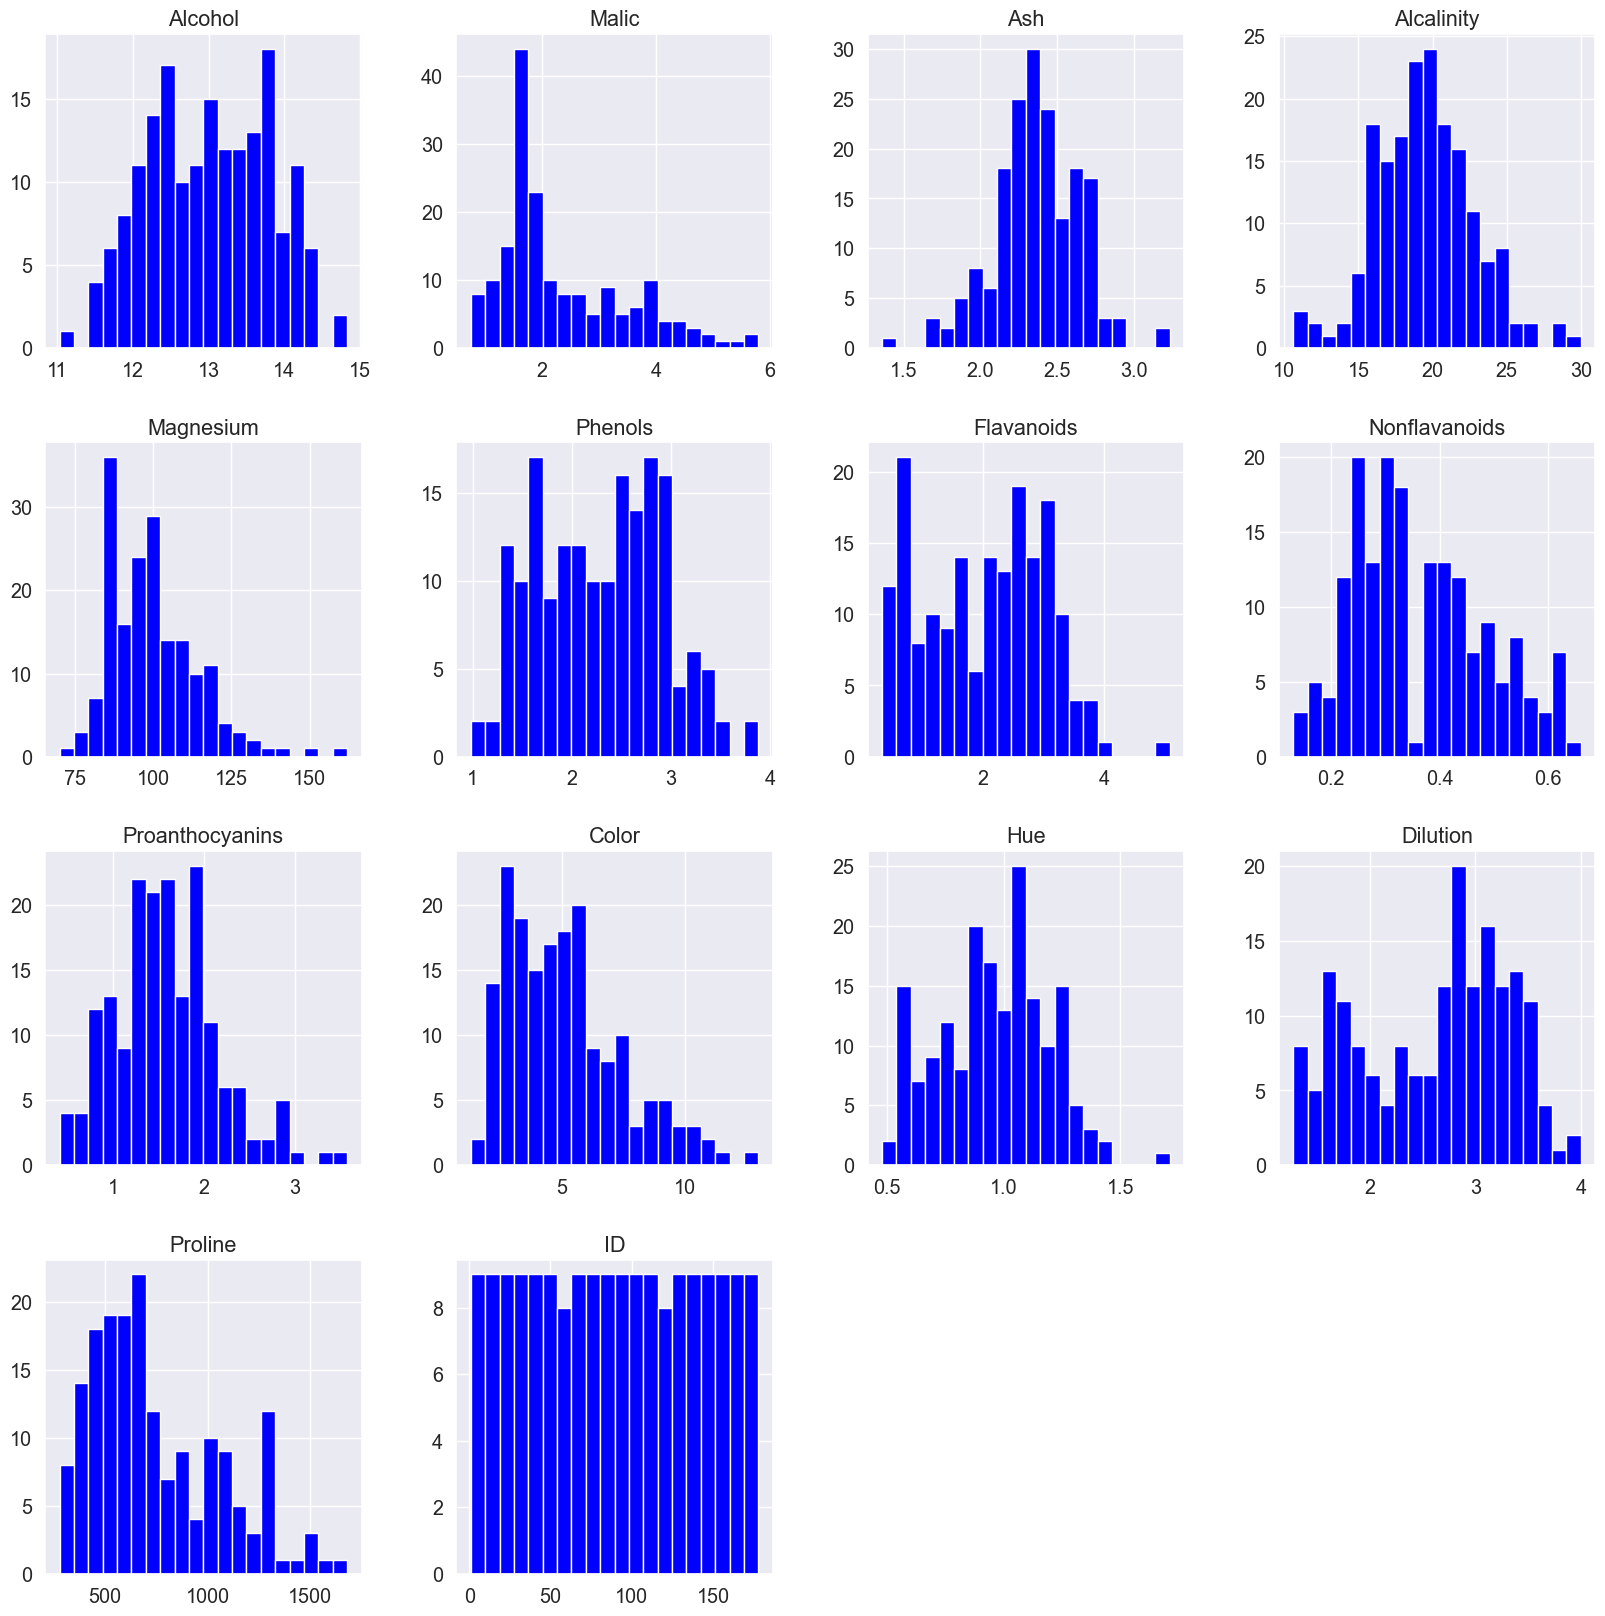

In [17]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

In [18]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

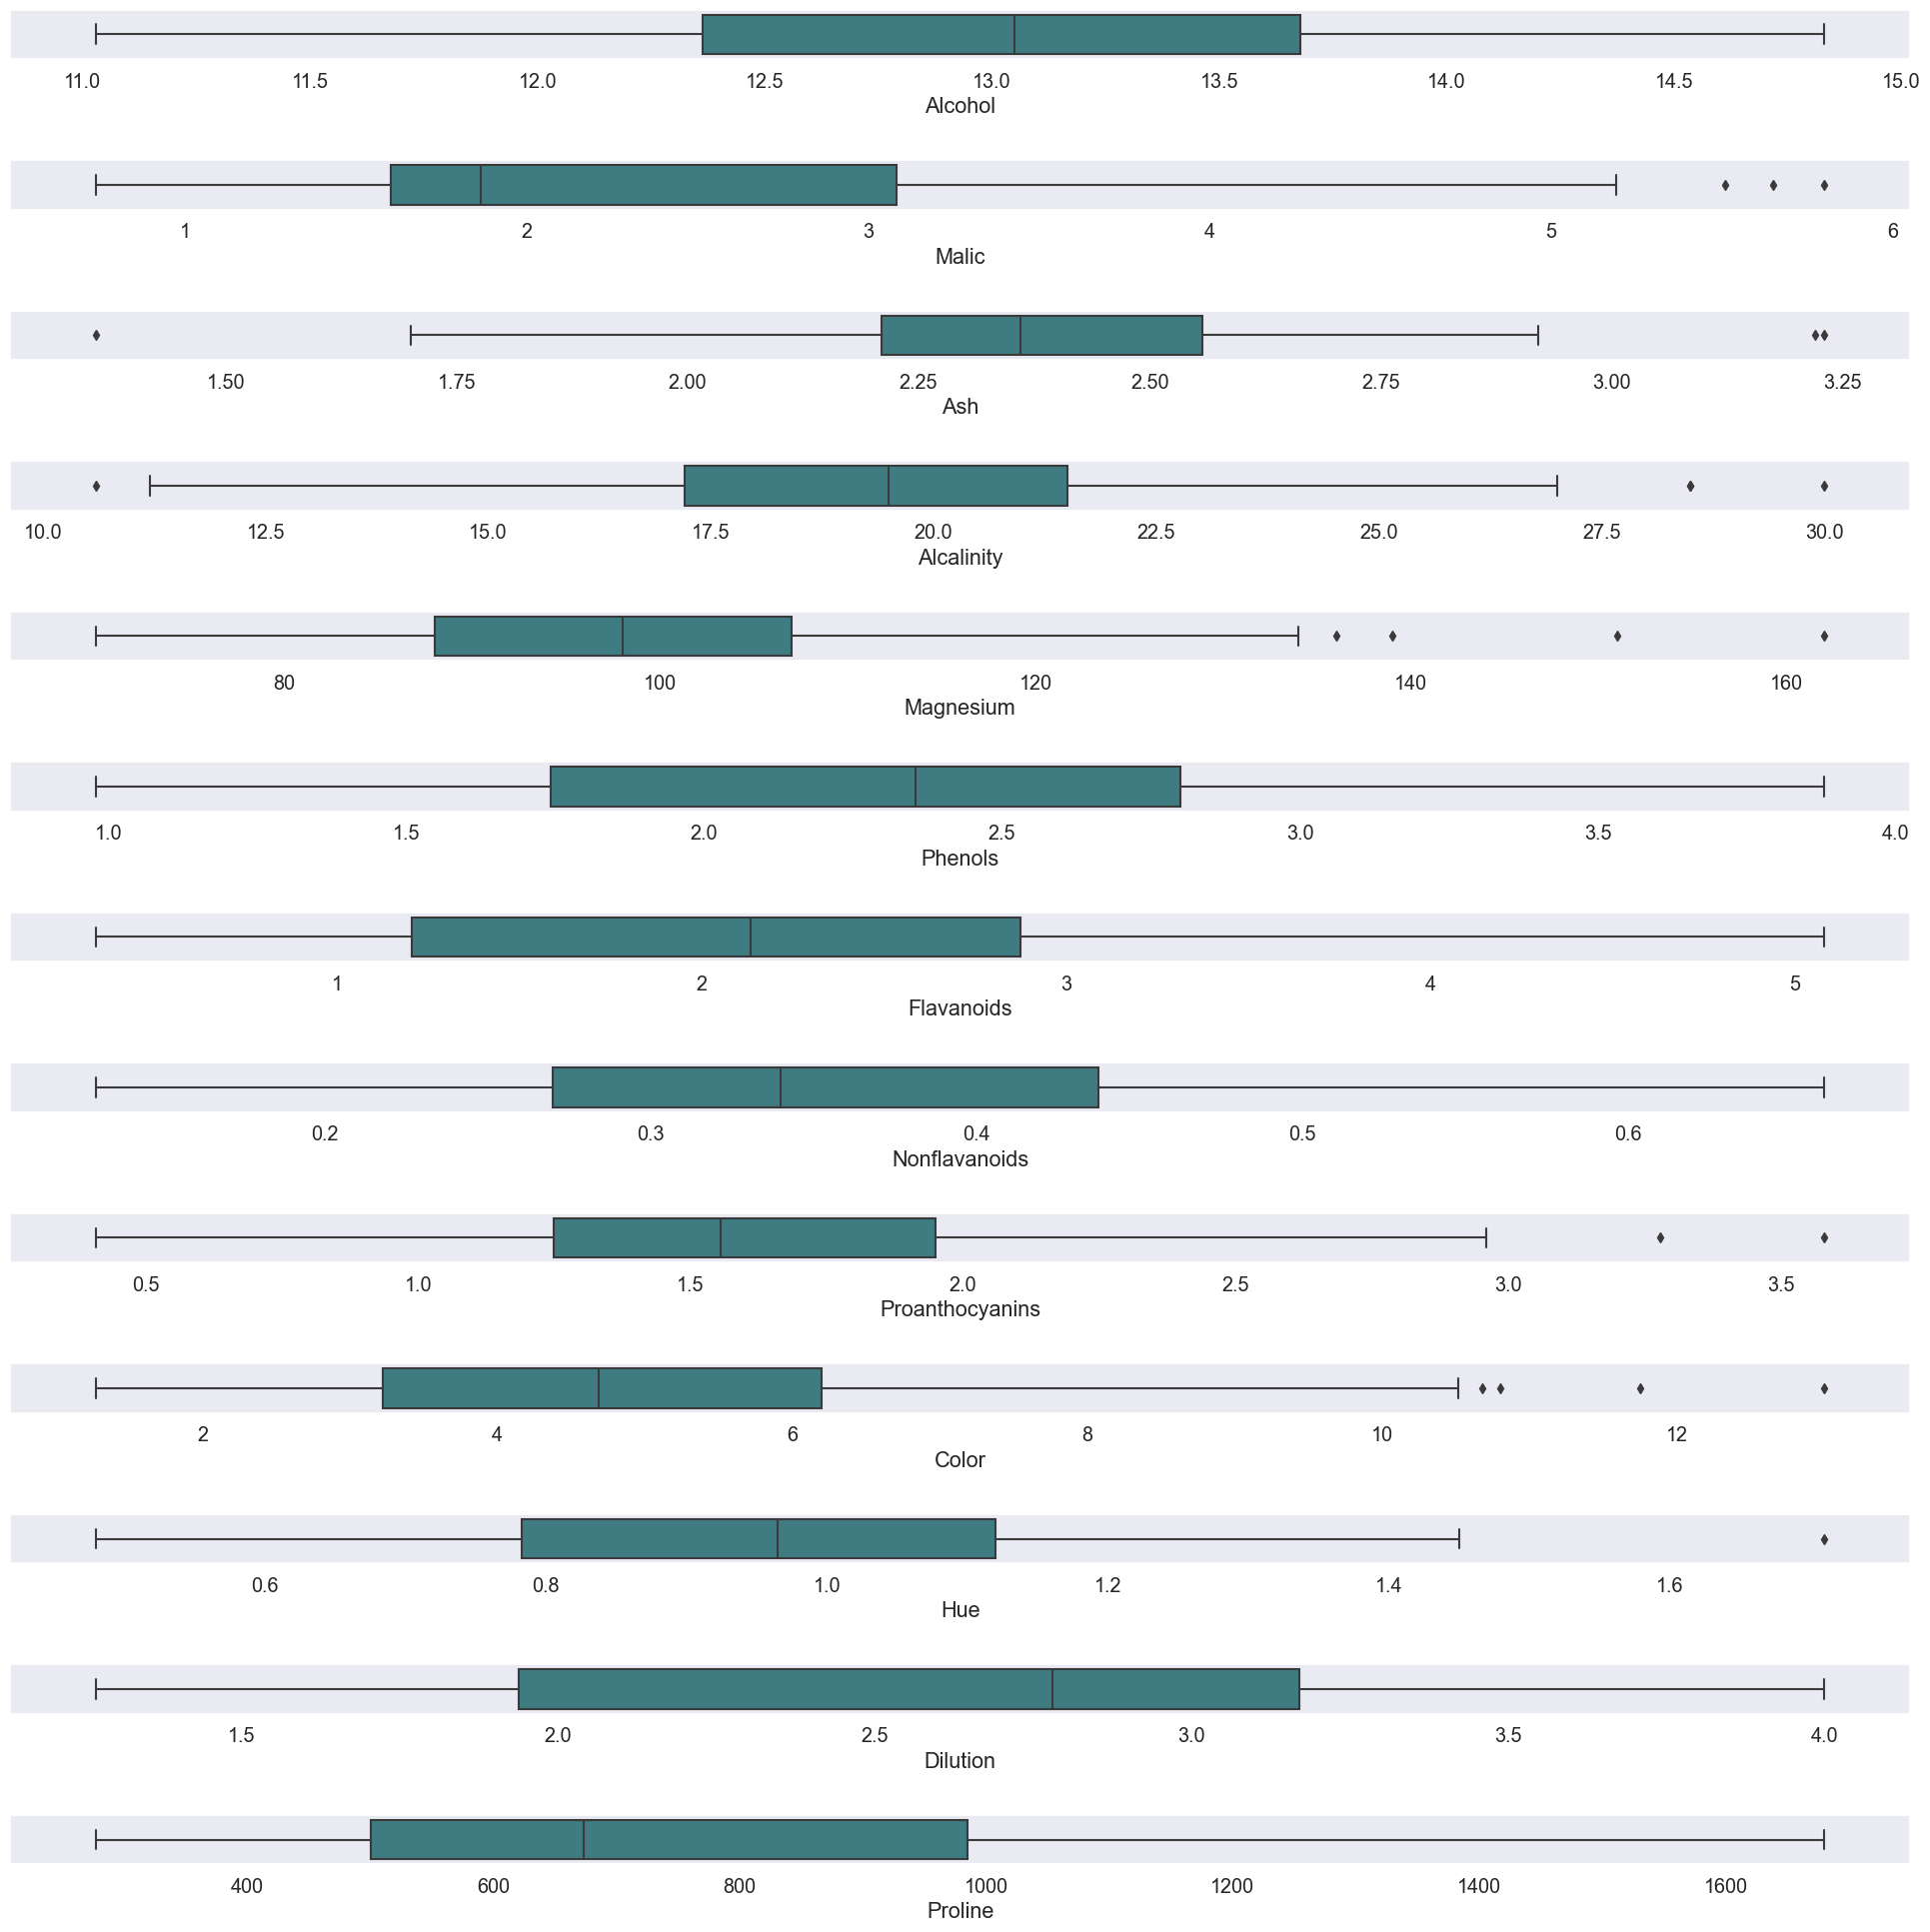

In [19]:
ot=df.copy() 
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

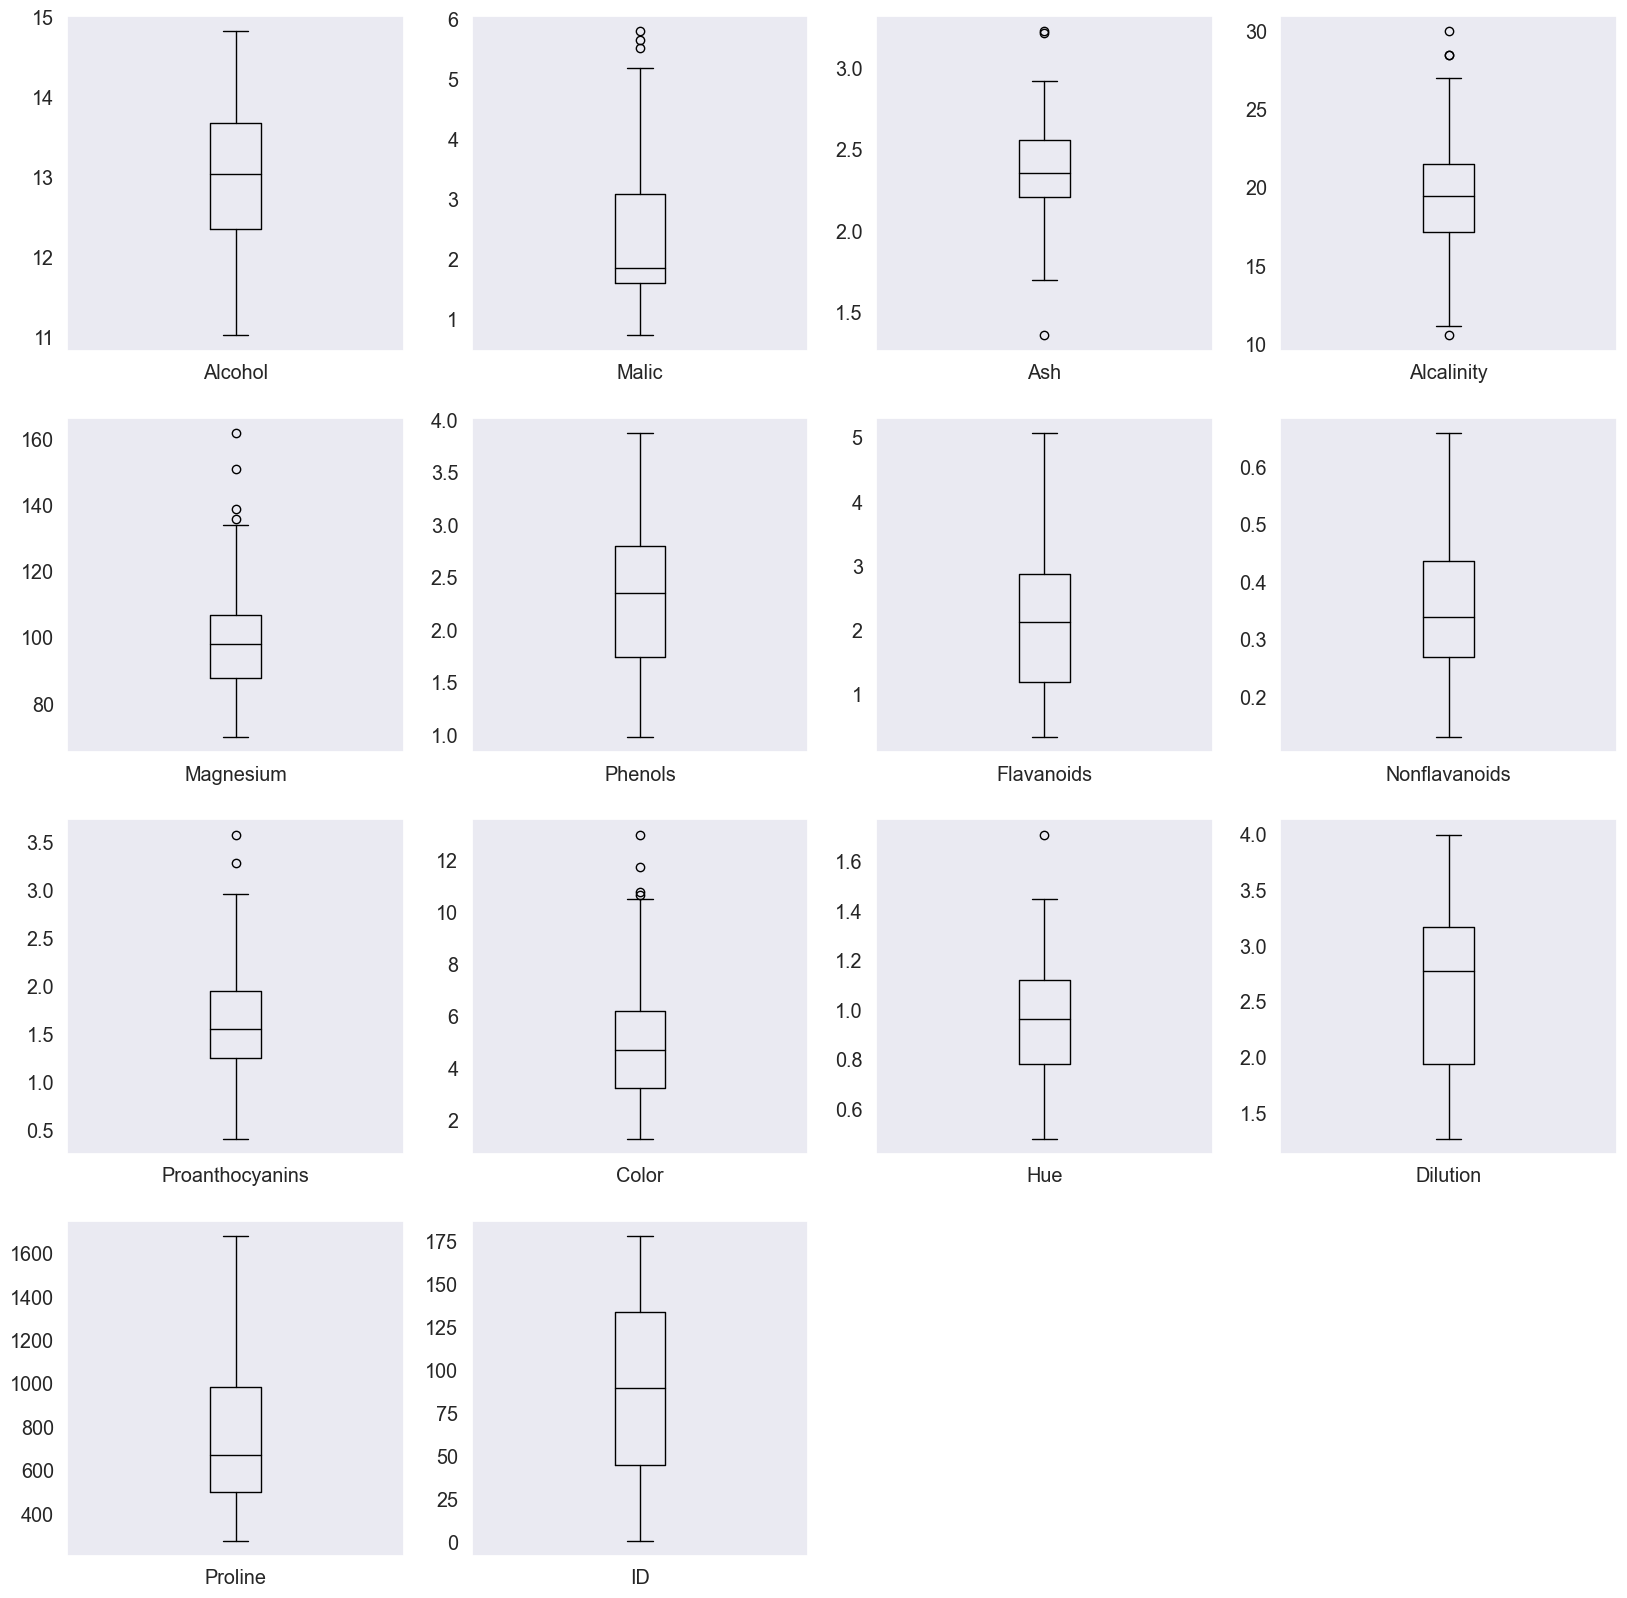

In [20]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

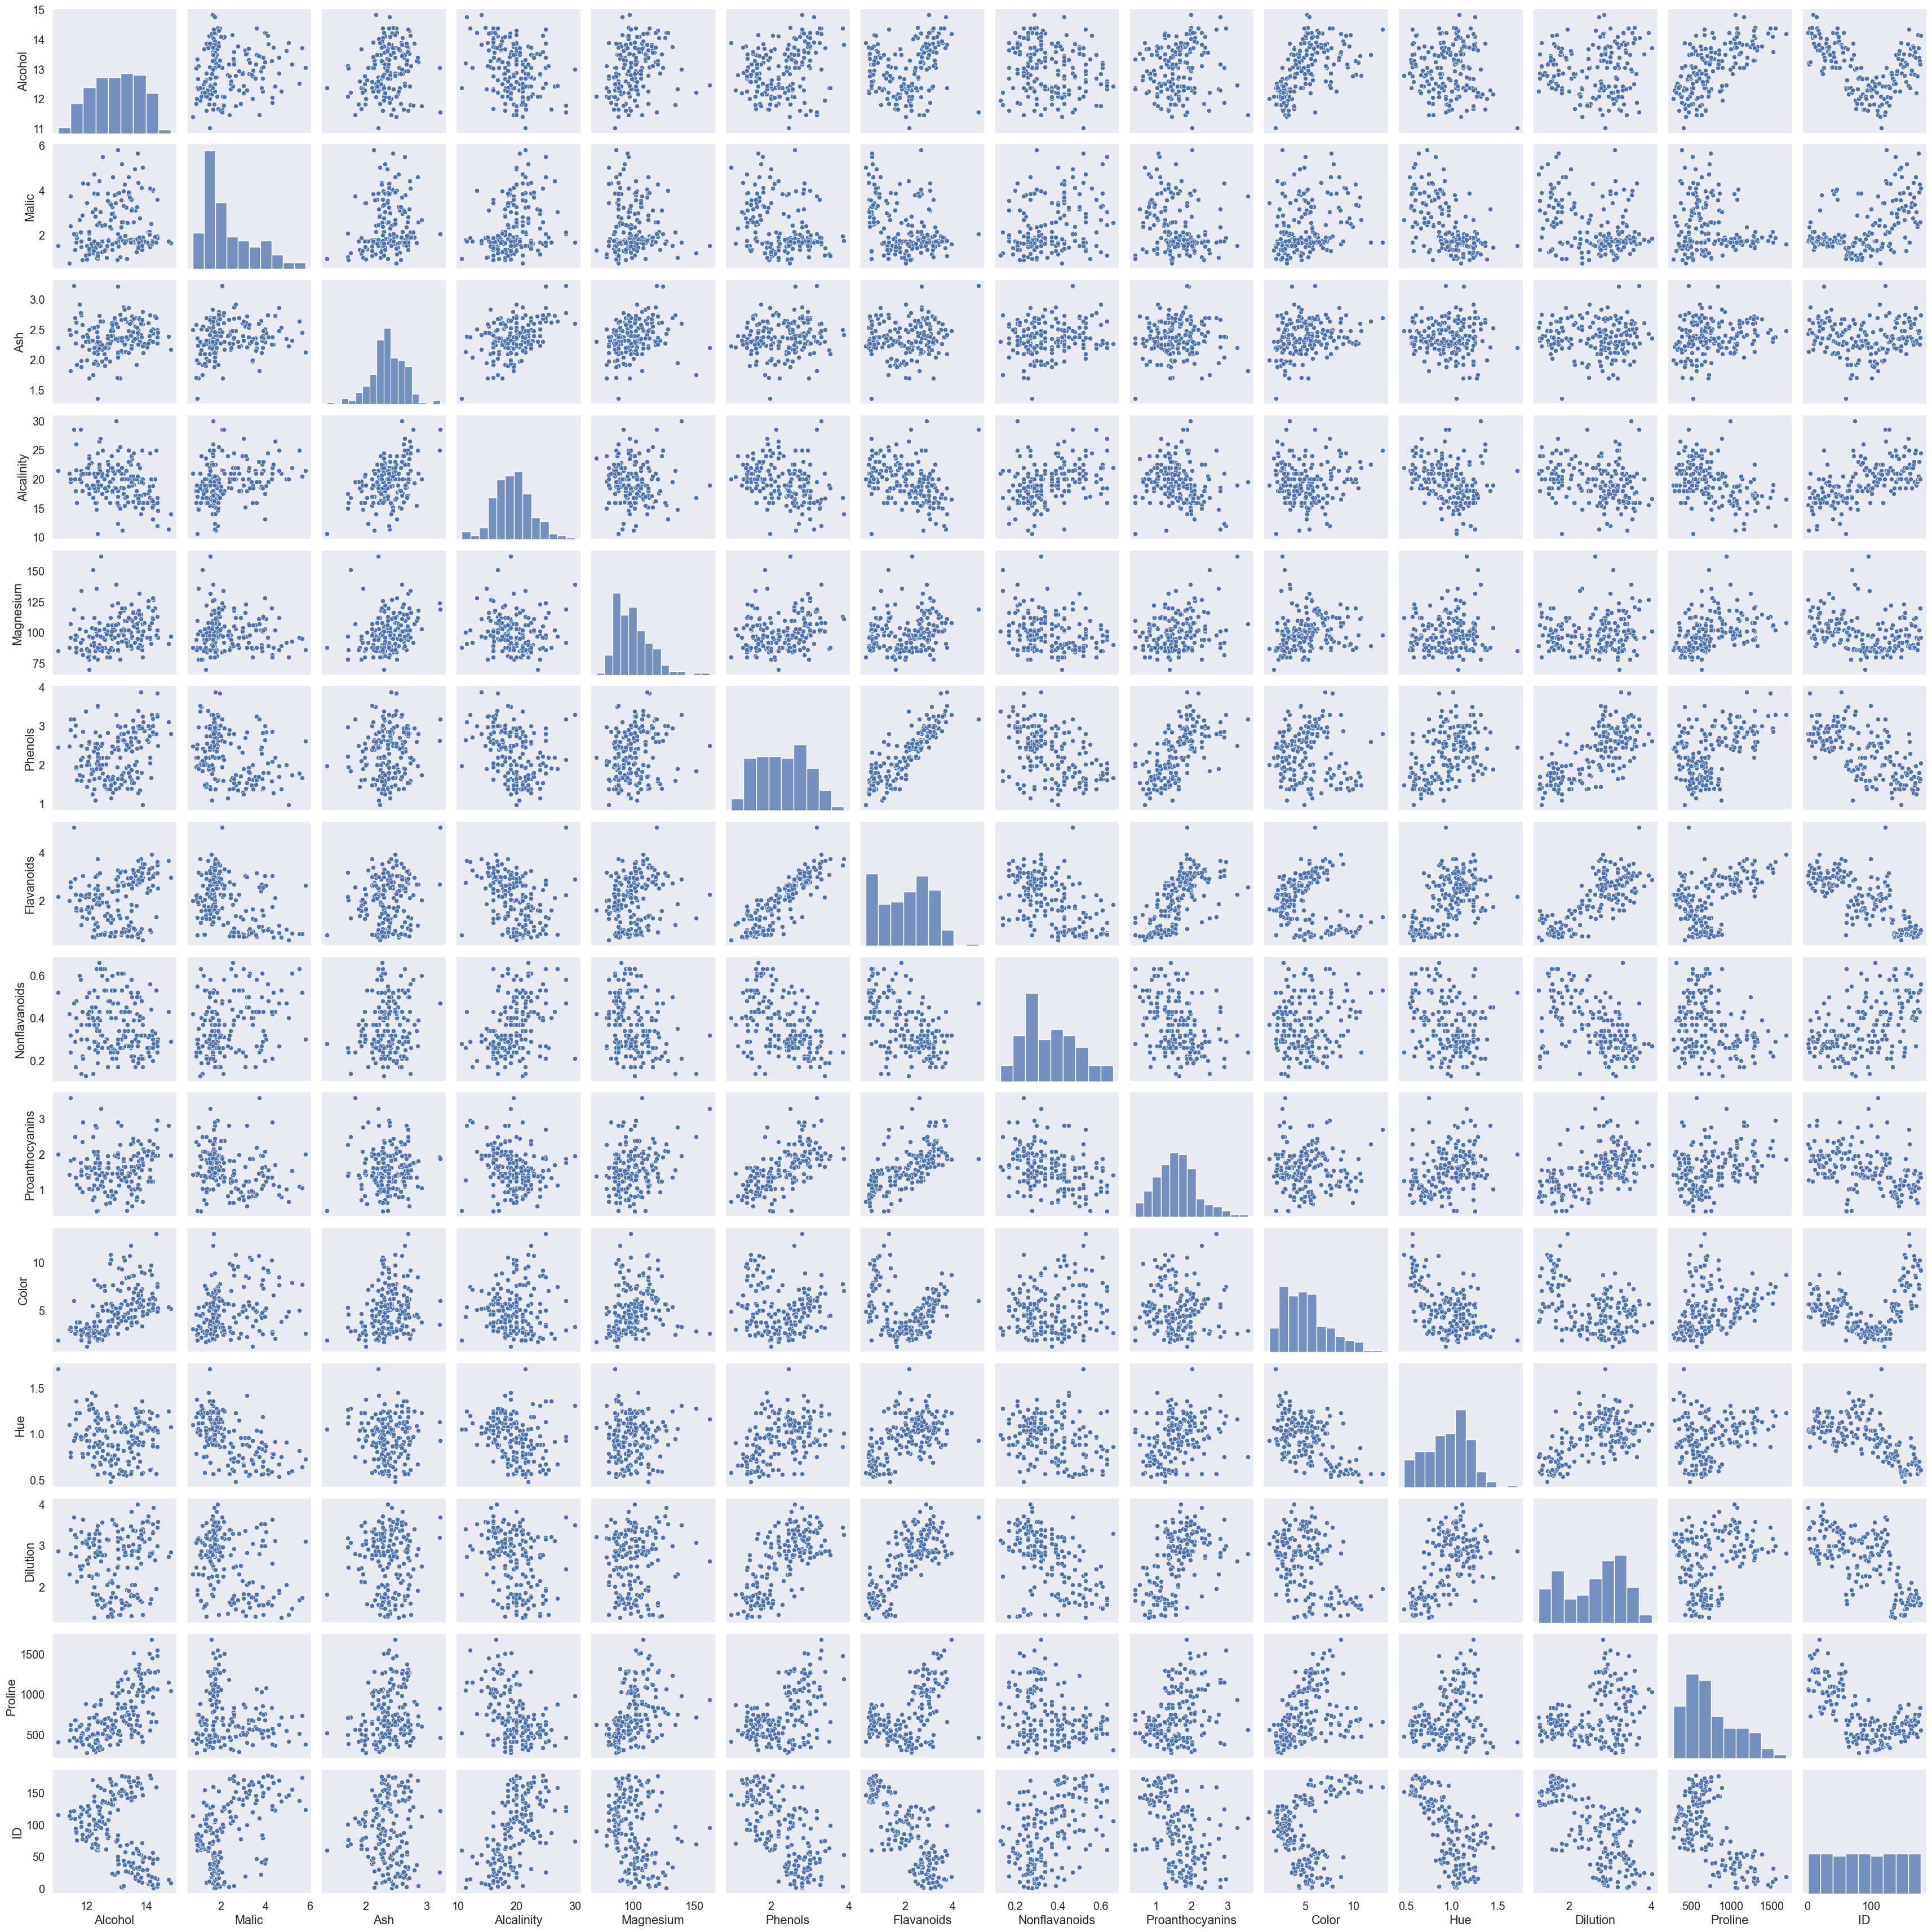

In [21]:
sns.pairplot(df,palette="dark")

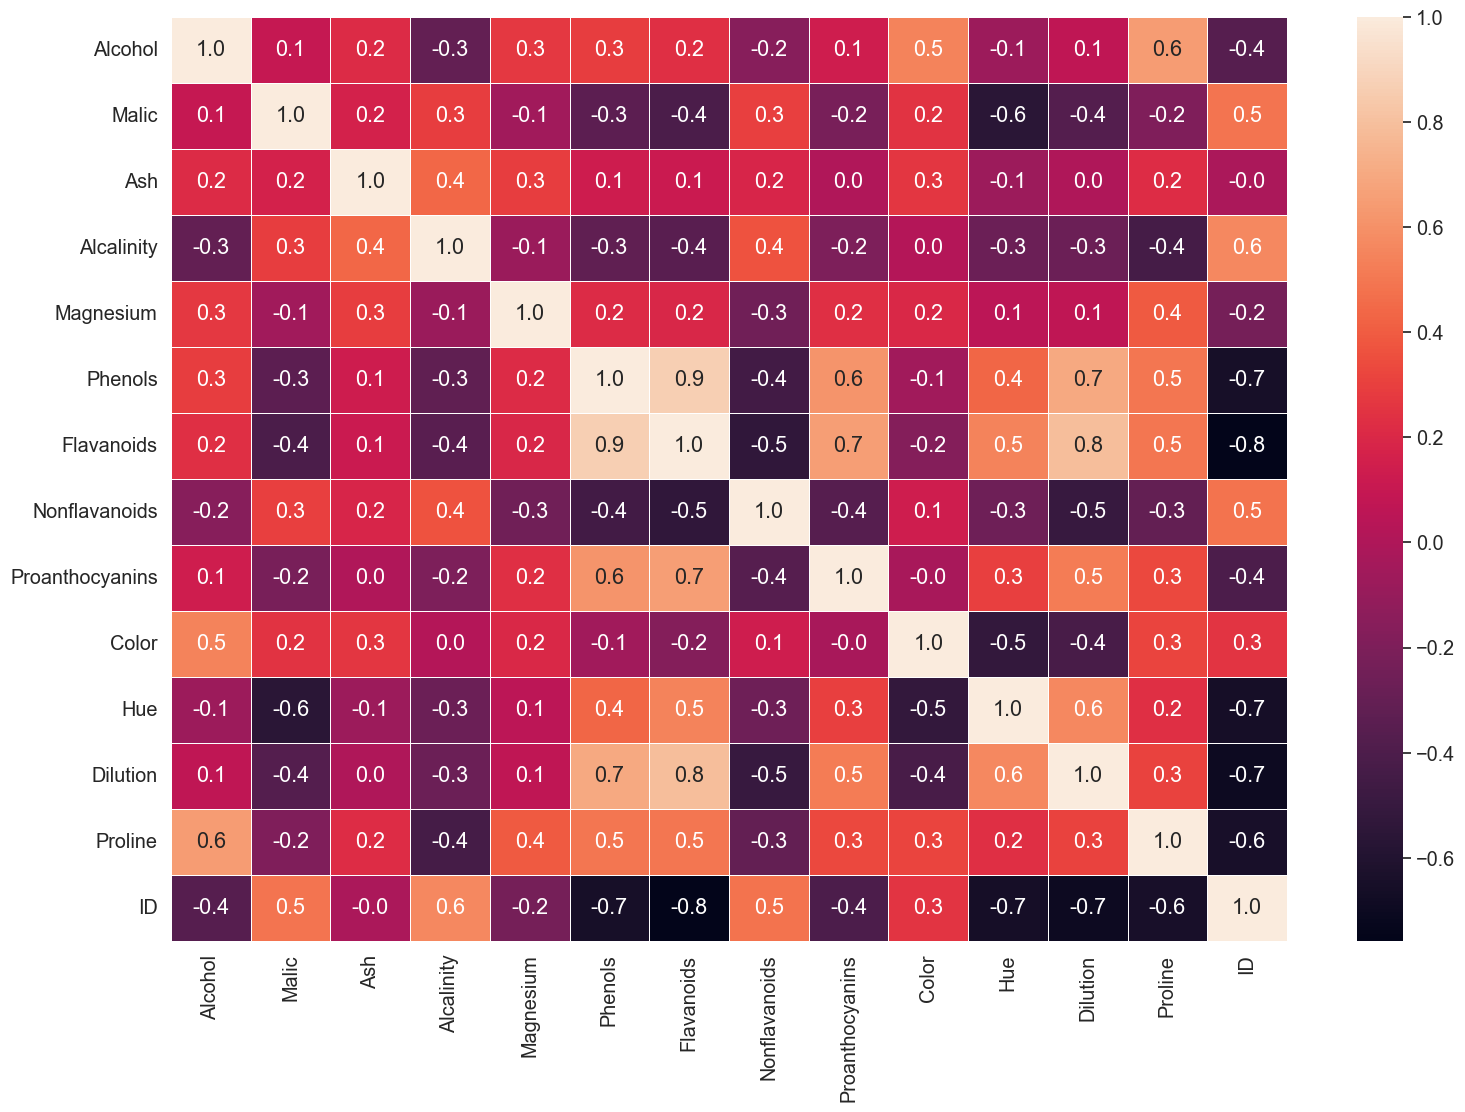

In [22]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

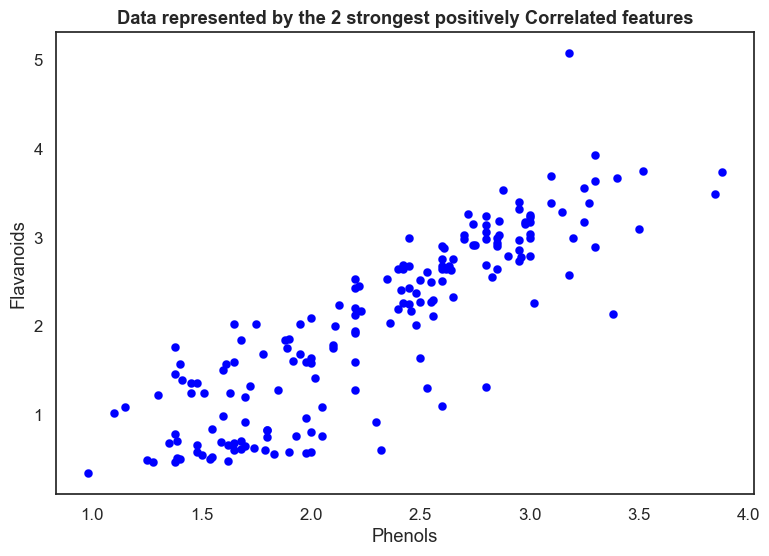

In [23]:
# Plotting frequent flying Phenols vs. Flavanoids  
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

In [24]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

In [25]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

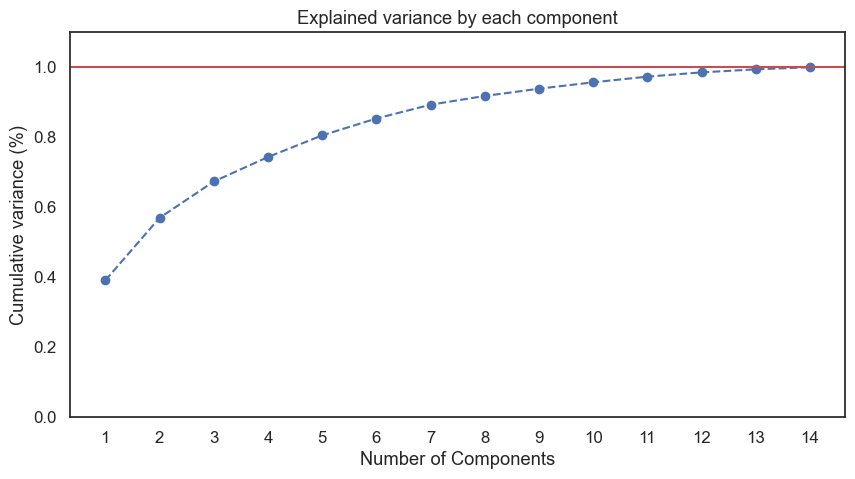

In [26]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [27]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

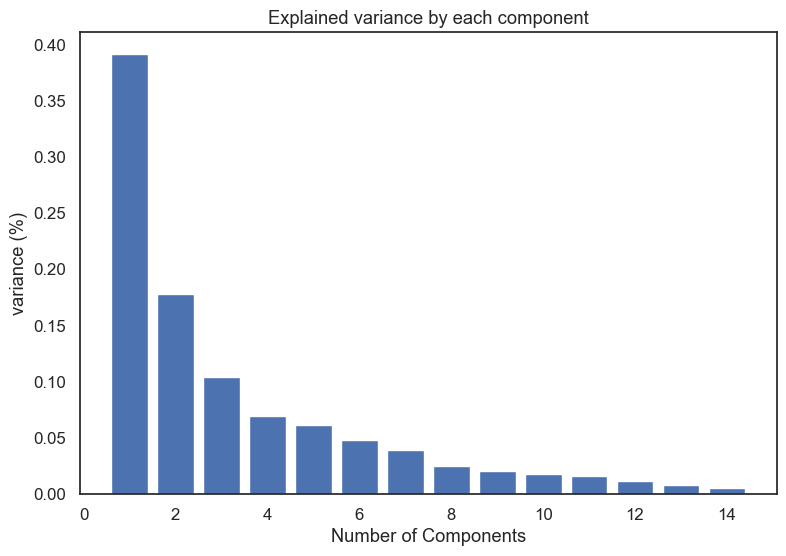

In [28]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [29]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [30]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

Text(0, 0.5, 'PC2')

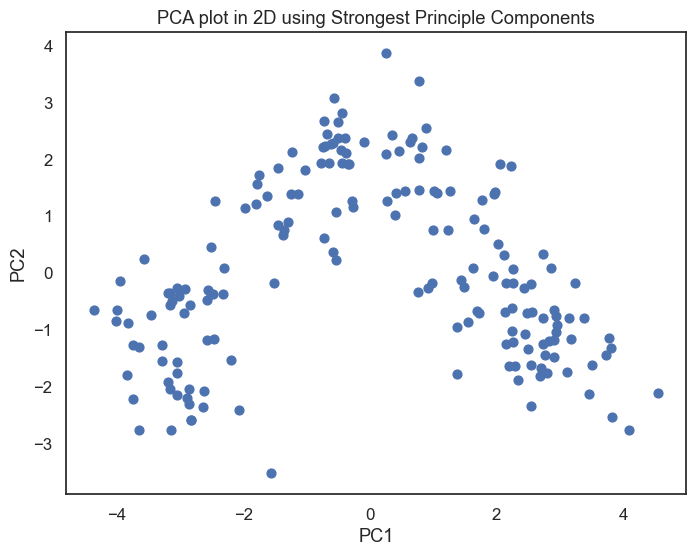

In [31]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

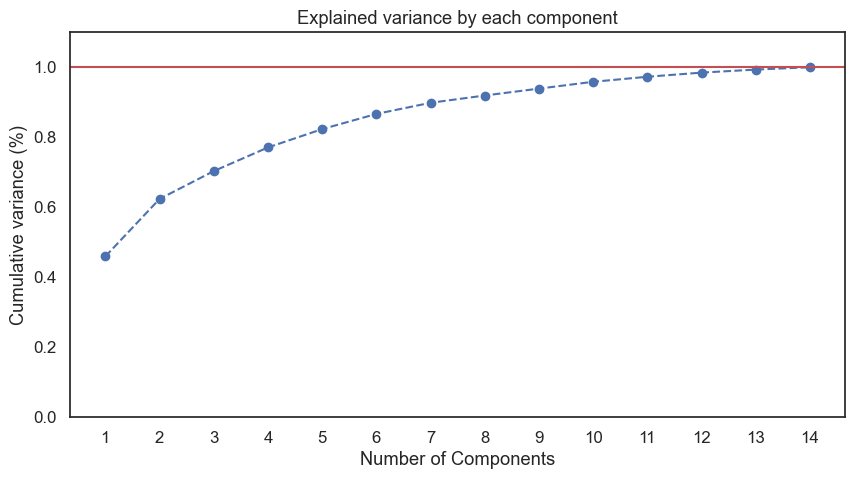

In [32]:
# PCA
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [33]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

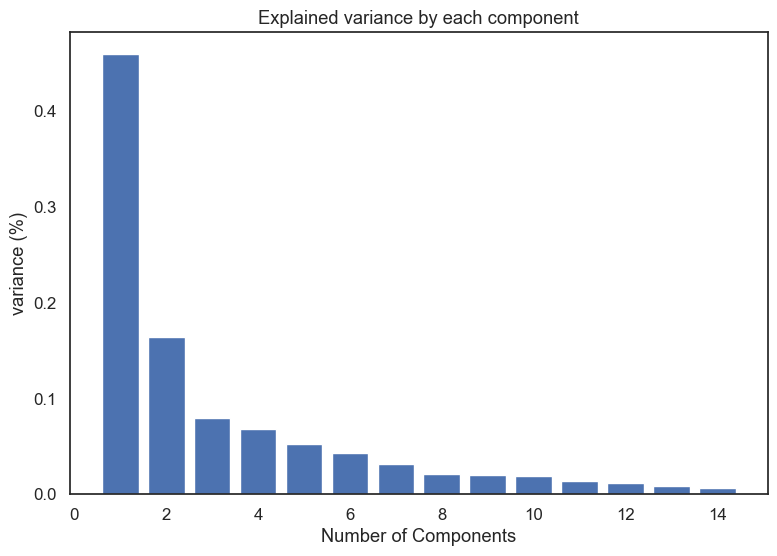

In [34]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [35]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [36]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

Text(0, 0.5, 'PC2')

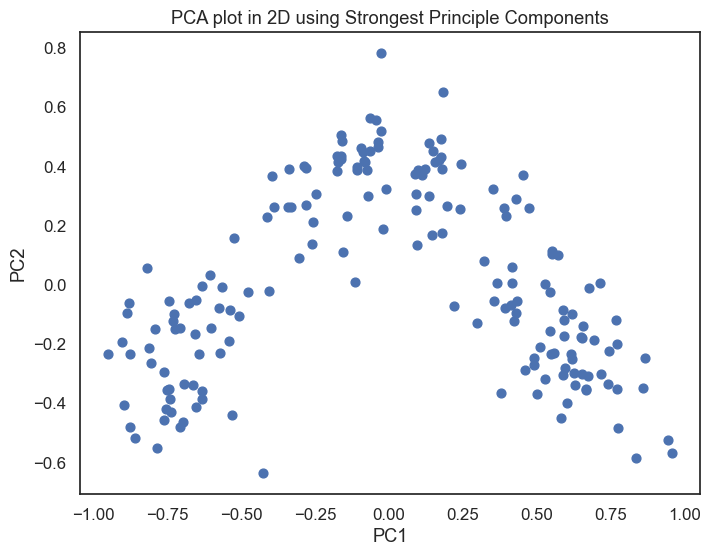

In [37]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [38]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.01it/s]


In [39]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.02it/s]


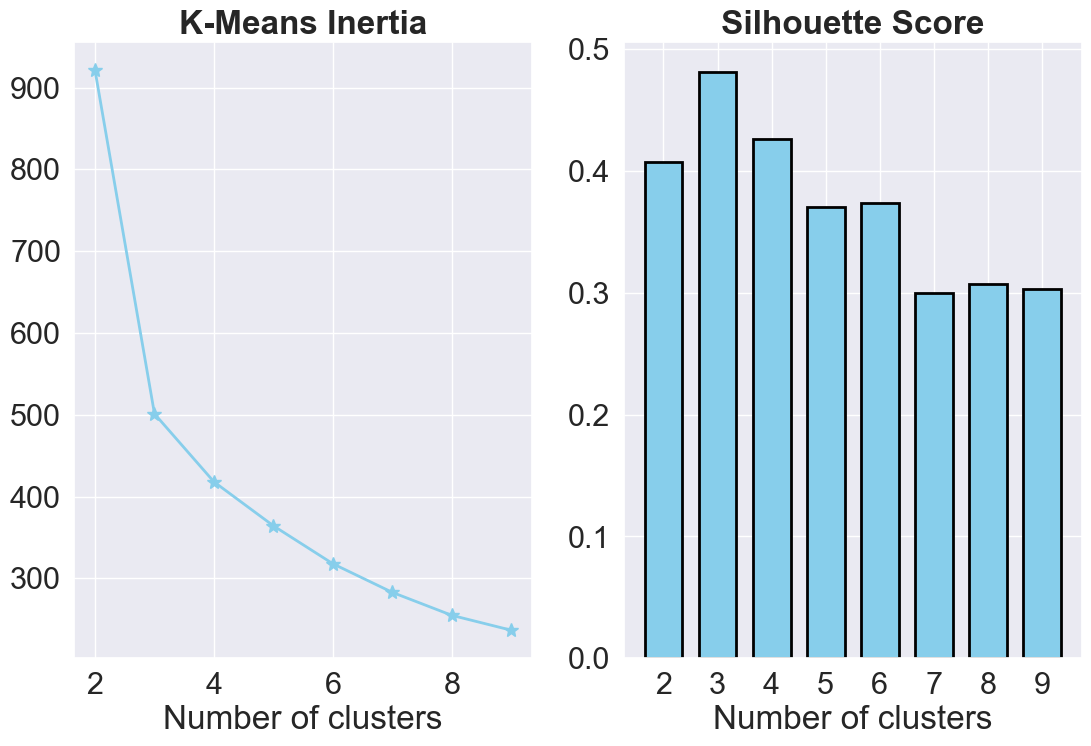

In [40]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

In [41]:
# Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [42]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [43]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [44]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [45]:
model_kmeans.inertia_

501.17482400537784

In [46]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

In [47]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000  98.640000    
1             2.000000  12.246418  1.891642  2.242985  20.140299  93.238806    
2             1.032787  13.711475  1.997049  2.453770  17.281967  107.786885   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200  0.807000   0.45040       1.156400        7.264400   
1             2.258209  2.085672   0.36194       1.612836        3.059701   
2             2.842131  2.969180   0.28918       1.922951        5.444590   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800  622.440000   152.380000  
1             1.059493  2.798507  508.597015   95.104478   
2             1.067705  3.154754  1110.639344  31.803279

In [48]:
# Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [49]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [50]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [51]:
model_kmeans.cluster_centers_

array([[-0.69579292, -0.23298991,  0.00190367],
       [-0.02383121,  0.35770859,  0.01239953],
       [ 0.58649203, -0.19289148, -0.01473472]])

In [52]:
model_kmeans.inertia_

18.717061925694445

In [53]:
df['Kmeans_label'] = model_kmeans.labels_

In [54]:
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000  98.640000   1.677200   
1             12.233333  1.905000  2.251212  20.218182  93.469697   2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0             0.807000   0.450400      1.156400        7.264400  0.686200   
1             2.069091   0.363485      1.602727        3.025758  1.058576   
2             2.972581   0.288710      1.928710        5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800  622.440000   152.380000  
1             2.792727  508.696970   95.530303   
2             3.155161  1100.822581  32.370968

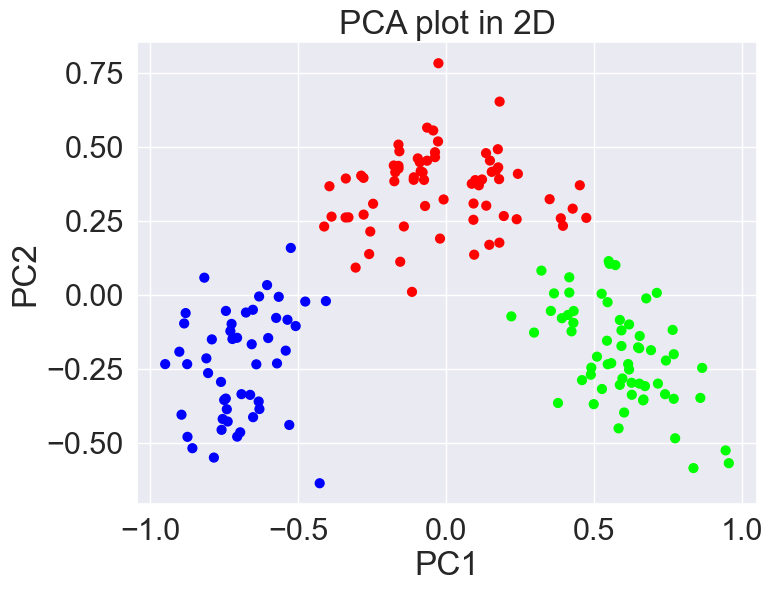

In [55]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

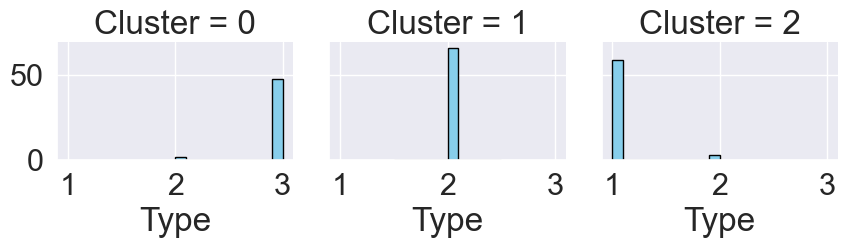

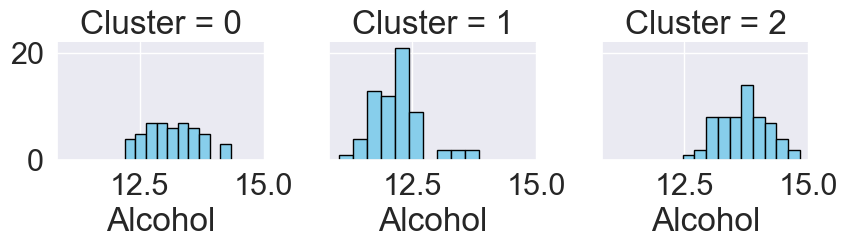

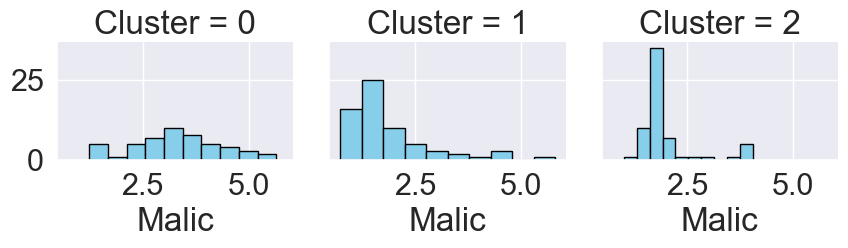

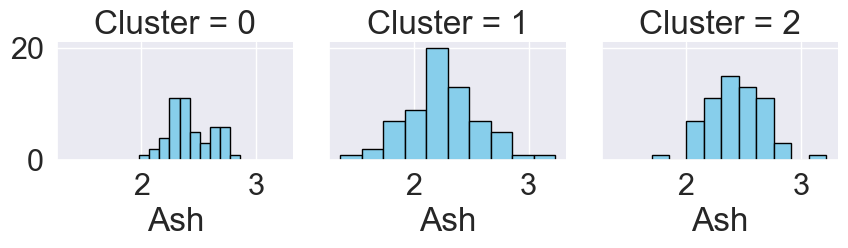

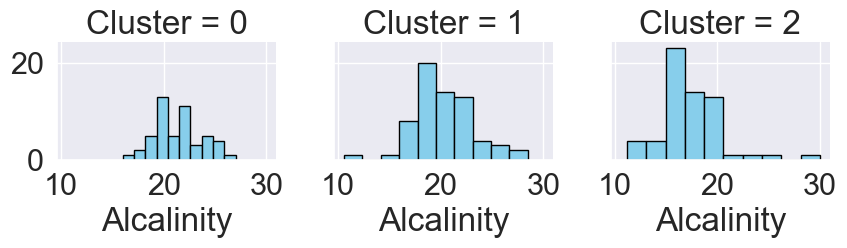

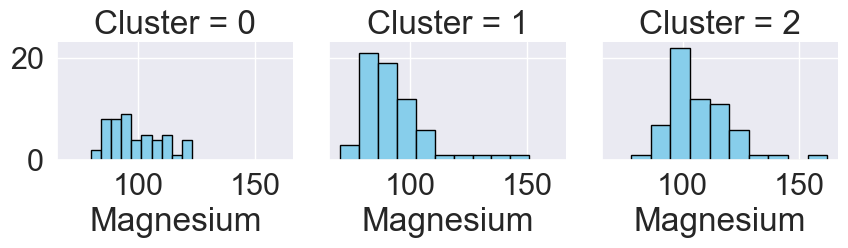

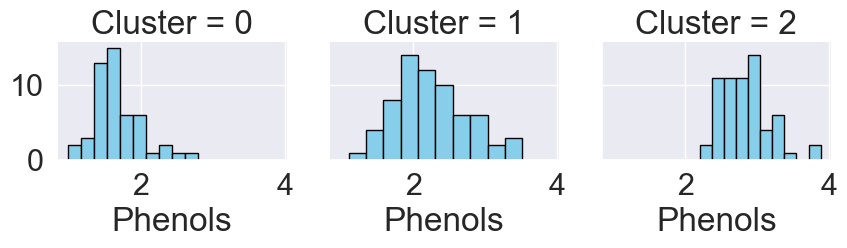

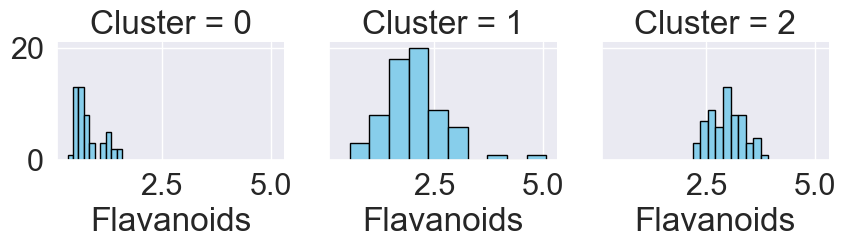

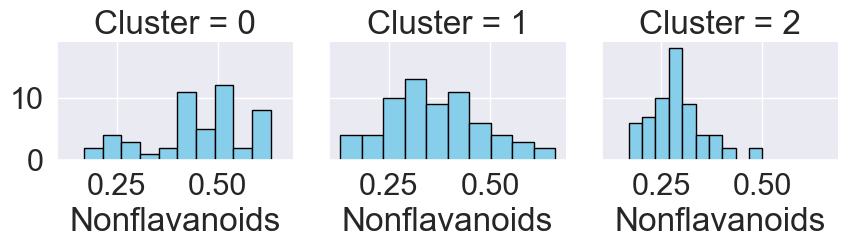

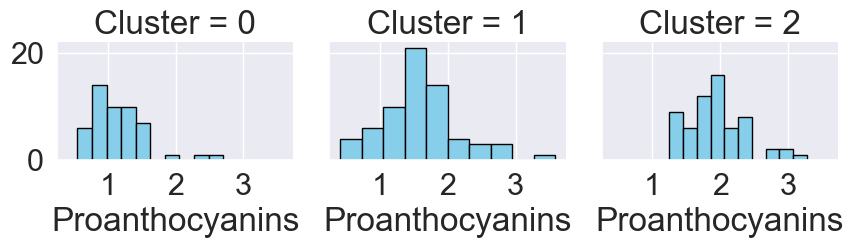

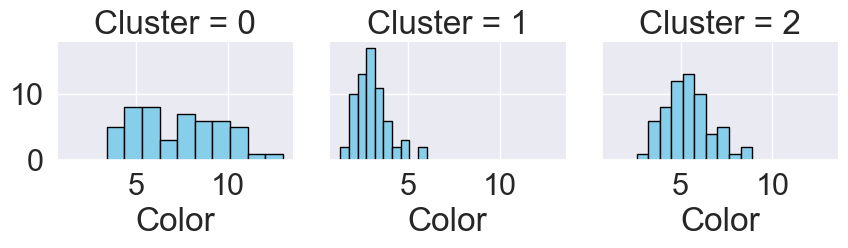

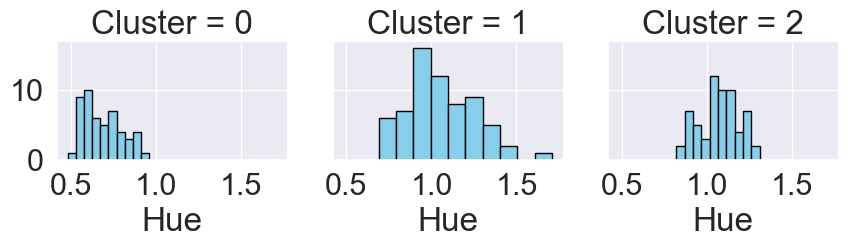

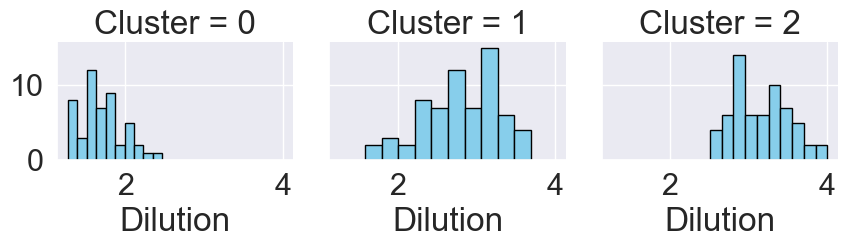

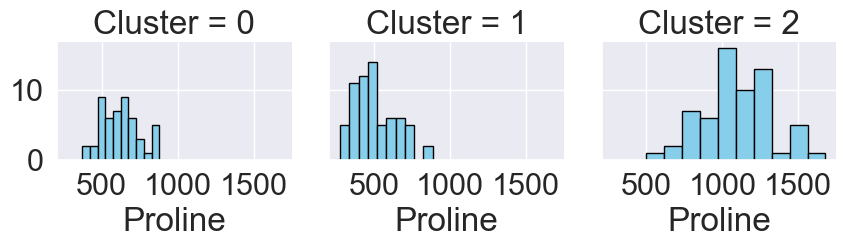

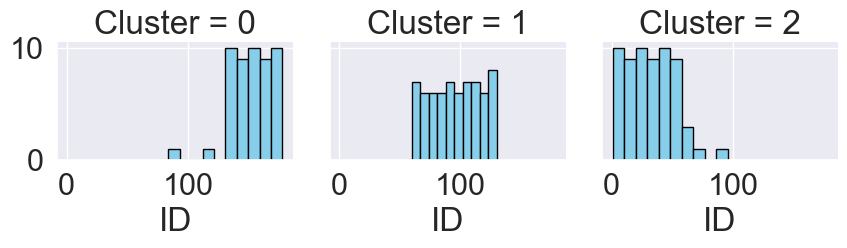

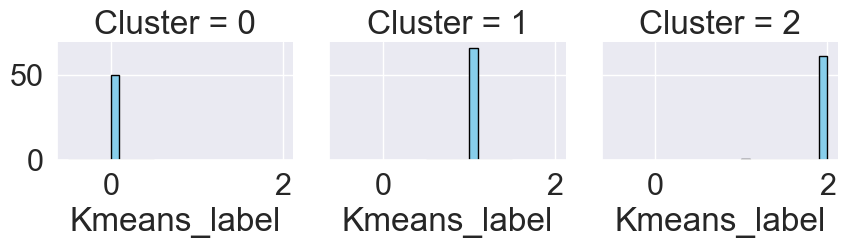

In [56]:
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [57]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [58]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type             2.9600        2.000000      1.048387    
Alcohol          13.1440       12.233333     13.701774   
Malic            3.3462        1.905000      1.981129    
Ash              2.4256        2.251212      2.441613    
Alcalinity       21.3300       20.218182     17.245161   
Magnesium        98.6400       93.469697     107.306452  
Phenols          1.6772        2.247273      2.844355    
Flavanoids       0.8070        2.069091      2.972581    
Nonflavanoids    0.4504        0.363485      0.288710    
Proanthocyanins  1.1564        1.602727      1.928710    
Color            7.2644        3.025758      5.442258    
Hue              0.6862        1.058576      1.068548    
Dilution         1.6988        2.792727      3.155161    
Proline          622.4400      508.696970    1100.822581 
ID               152.3800      95.530303     32.370968   
Kmeans_label     0.0000        1.000000      1.983871    
Cluster          0.0000        1.000000      2.000000

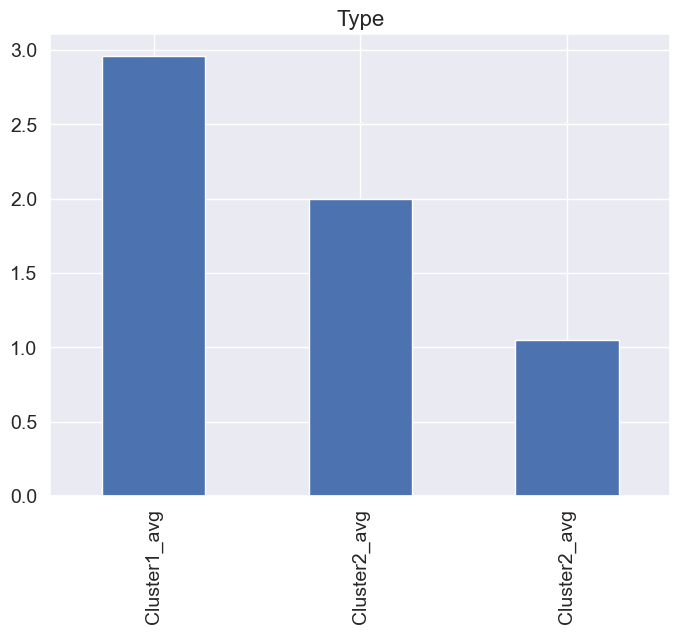

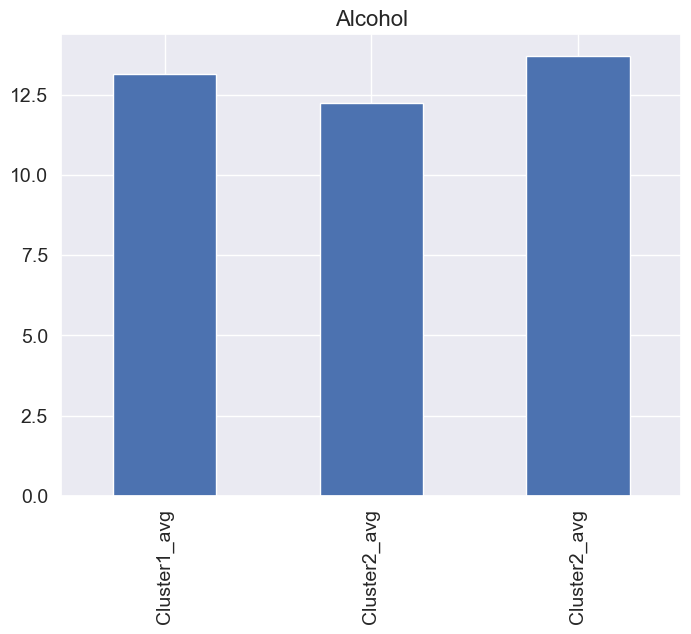

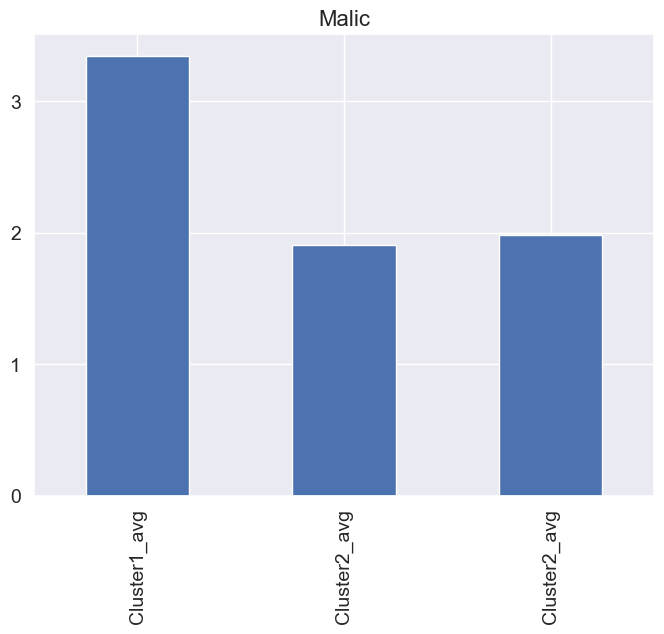

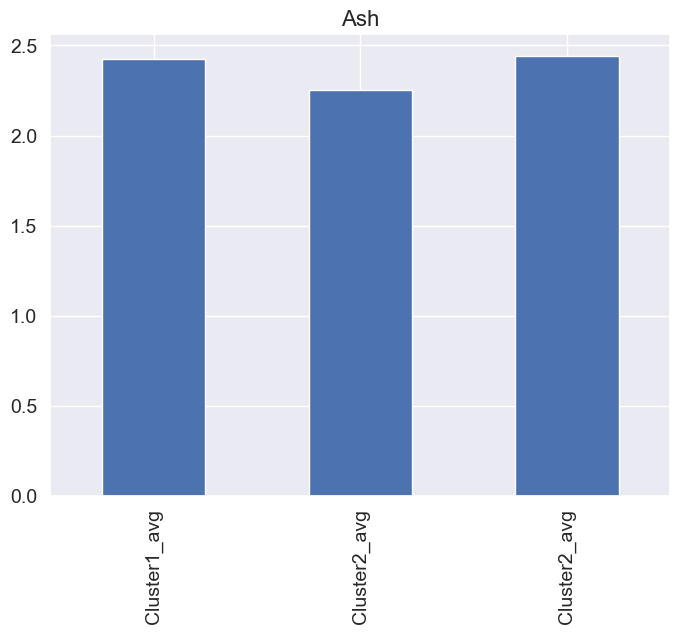

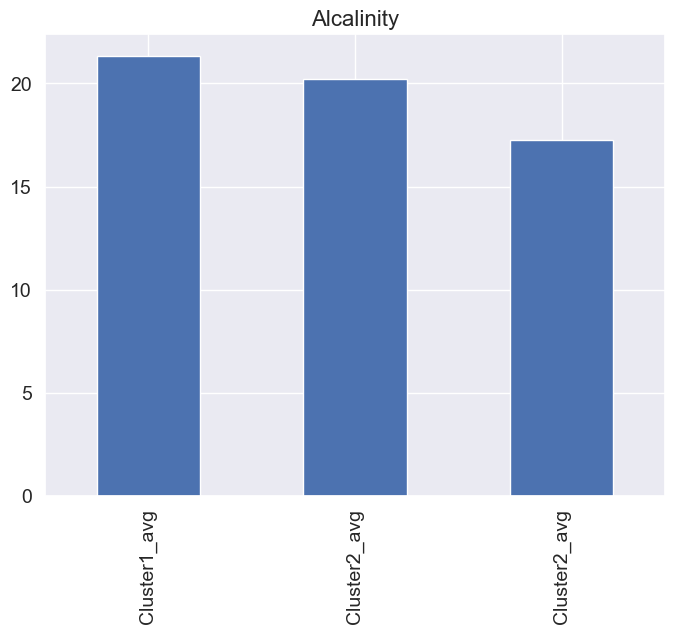

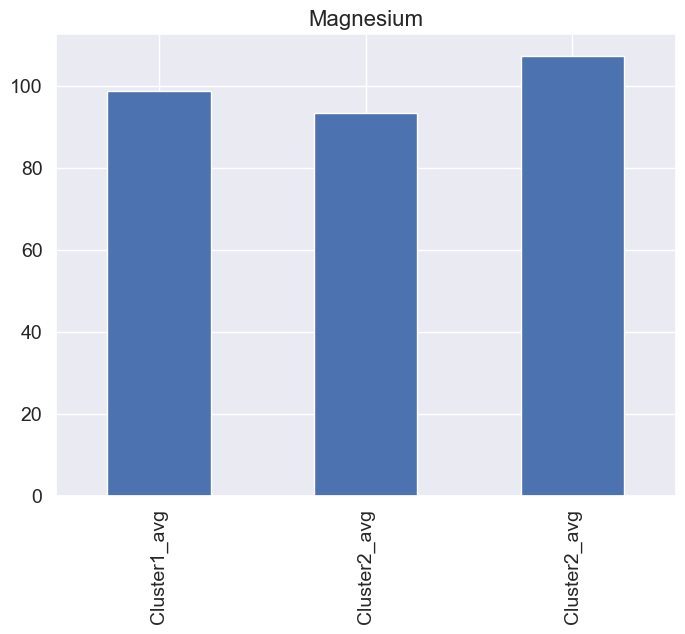

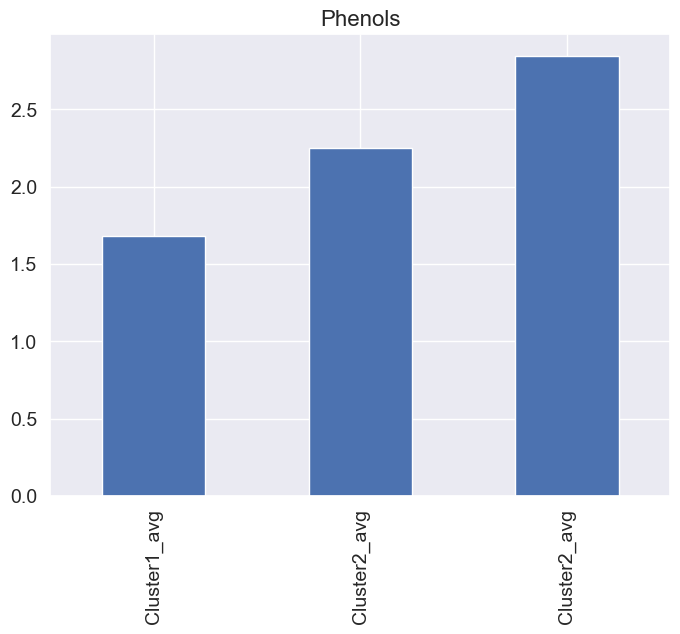

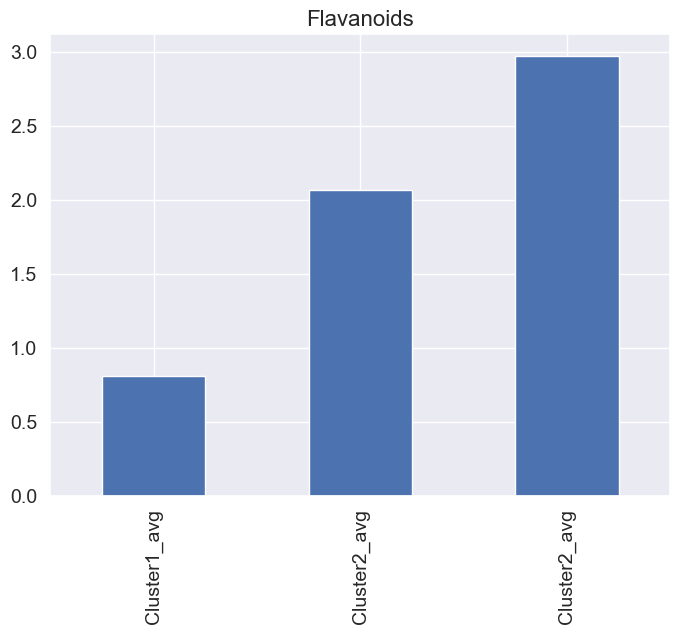

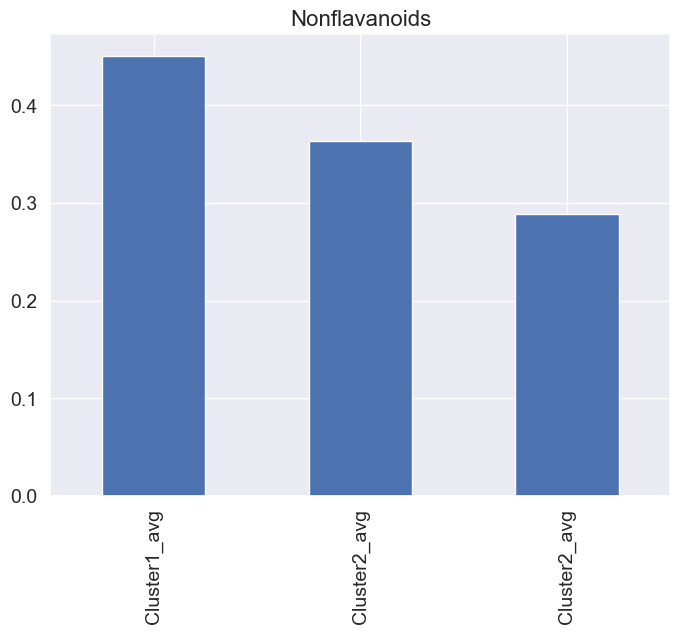

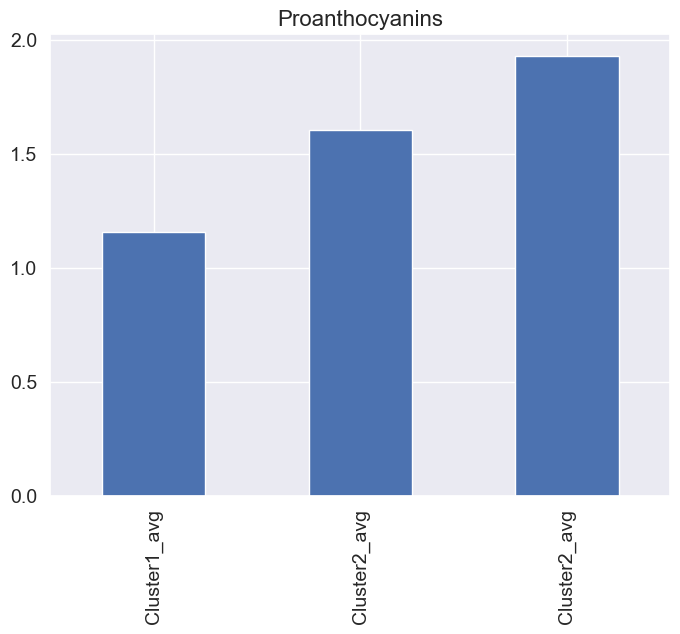

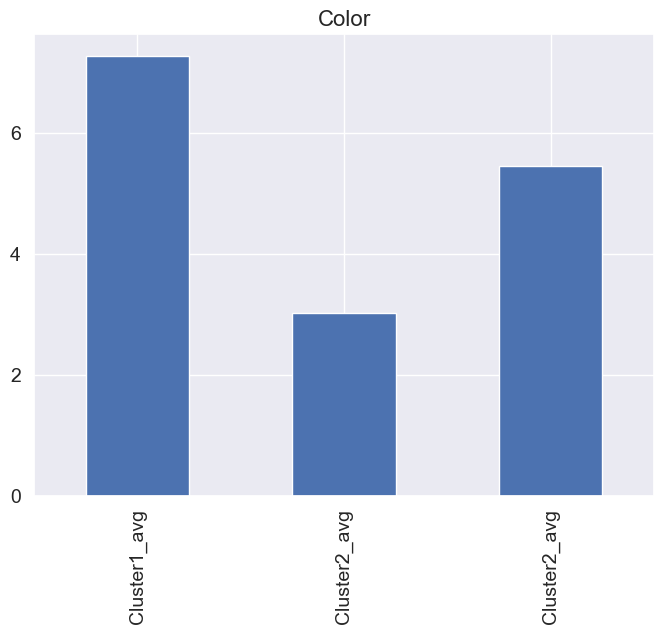

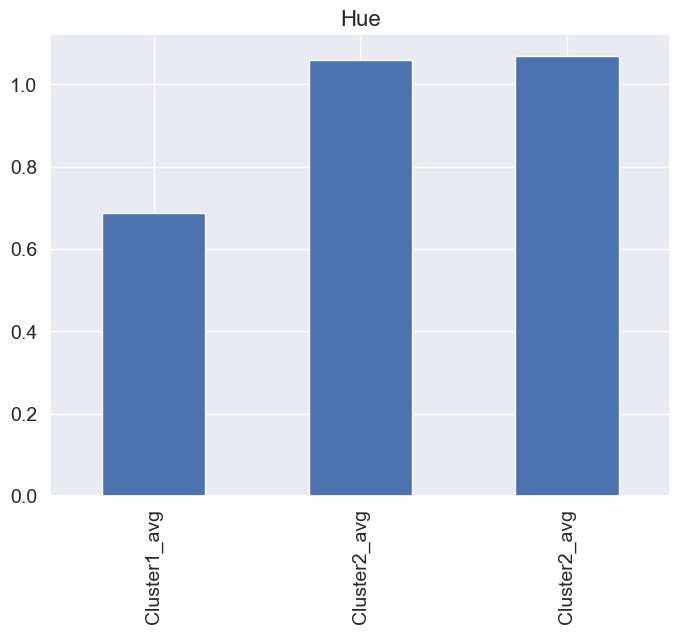

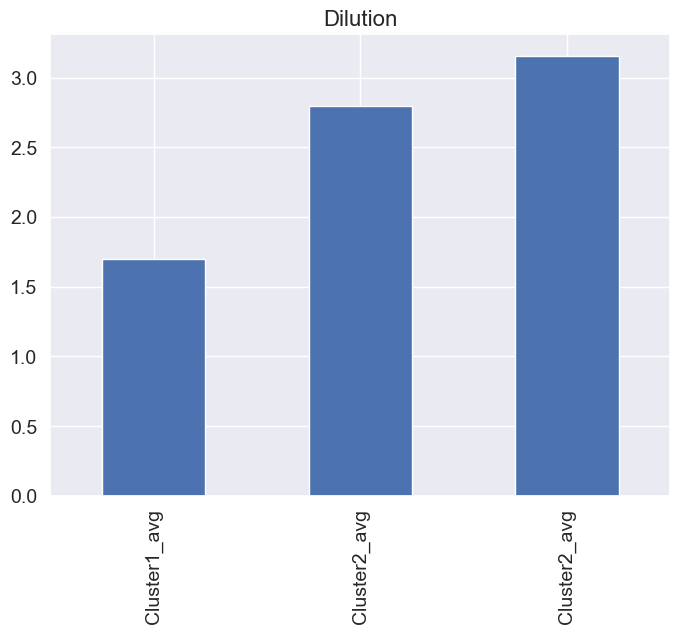

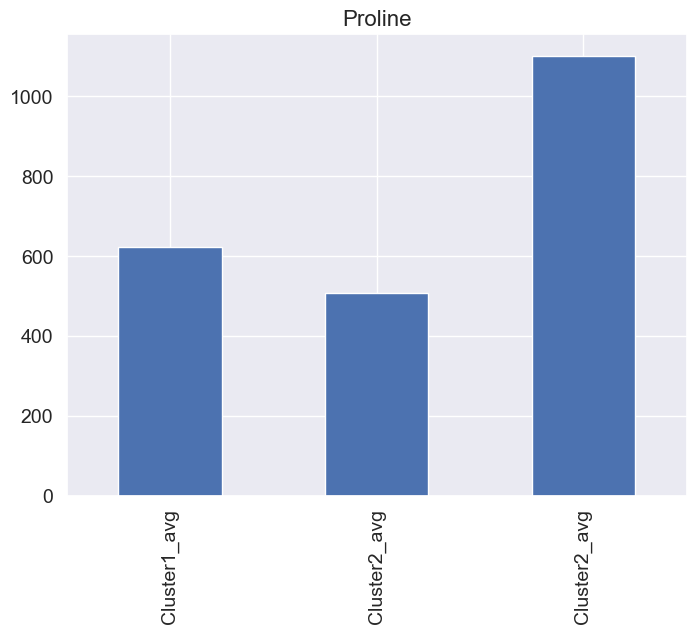

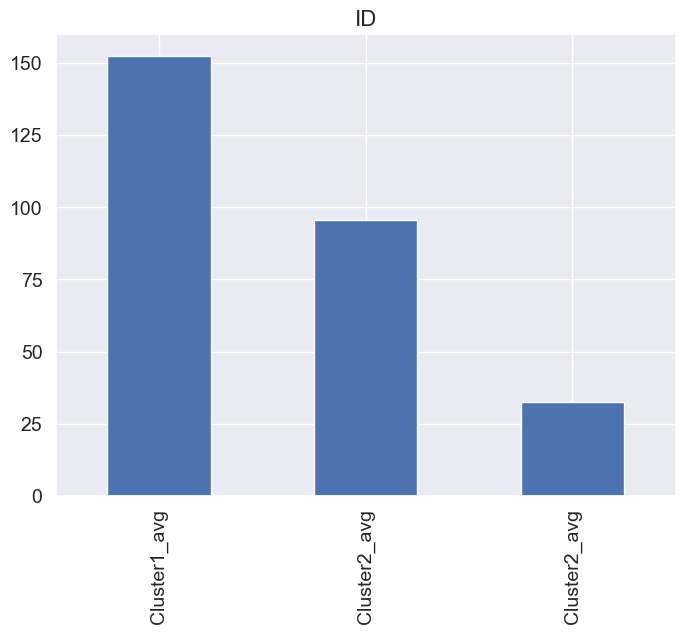

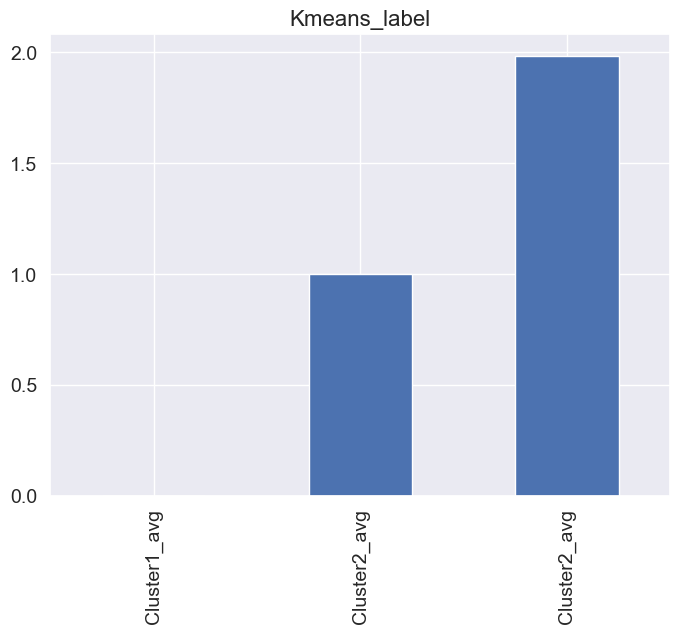

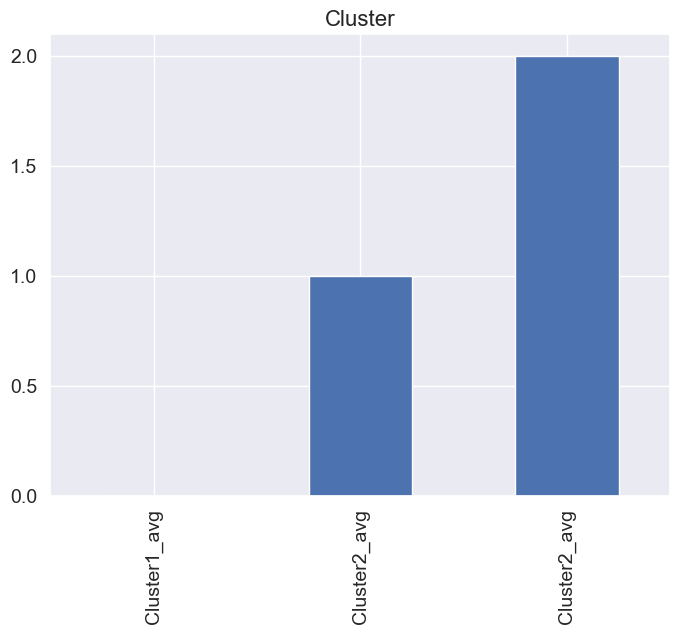

In [59]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

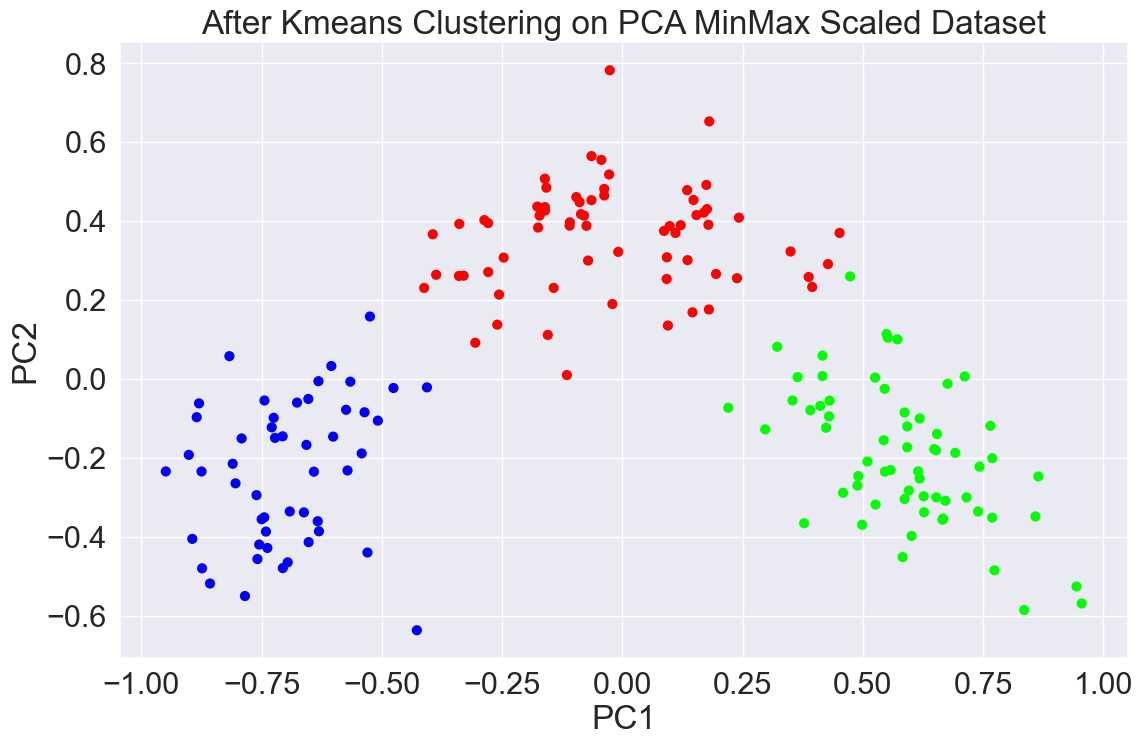

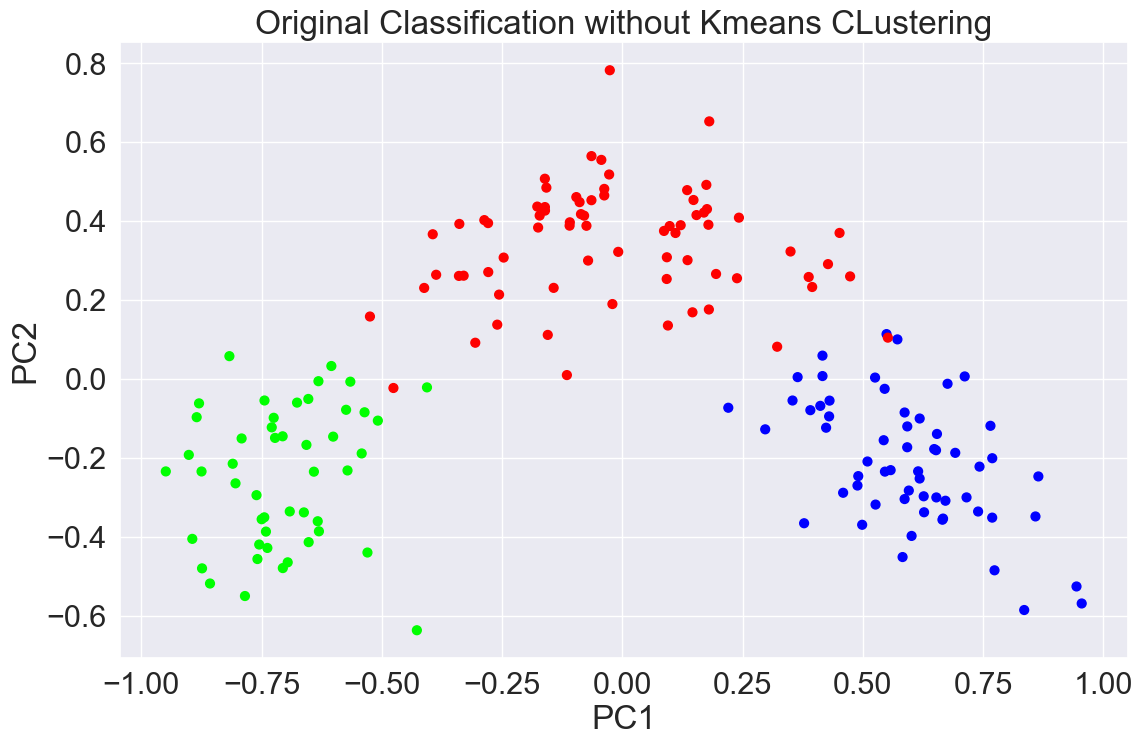

In [60]:
# Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [61]:
# Group data by Clusters (K=3)
display('After Applying PCA and Kmens CLustering on Dataset',df.groupby('Kmeans_label').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000  98.640000   1.677200   
1             12.233333  1.905000  2.251212  20.218182  93.469697   2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0             0.807000   0.450400      1.156400        7.264400  0.686200   
1             2.069091   0.363485      1.602727        3.025758  1.058576   
2             2.972581   0.288710      1.928710        5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800  622.440000   152.380000  
1             2.792727  508.696970   95.530303   
2             3.155161  1100.822581  32.370968

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.0          
2     519.507042   95.0   1.0          
3     629.895833   154.5  0.0

In [62]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(minmax_df)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


tsne comp. 1  tsne comp. 2
0 -12.843501     4.622280    
1 -8.109446      4.097597    
2 -10.192375     9.380810    
3 -13.044347     7.973423    
4 -6.342848      7.565739

Text(0, 0.5, 'tsne component 2')

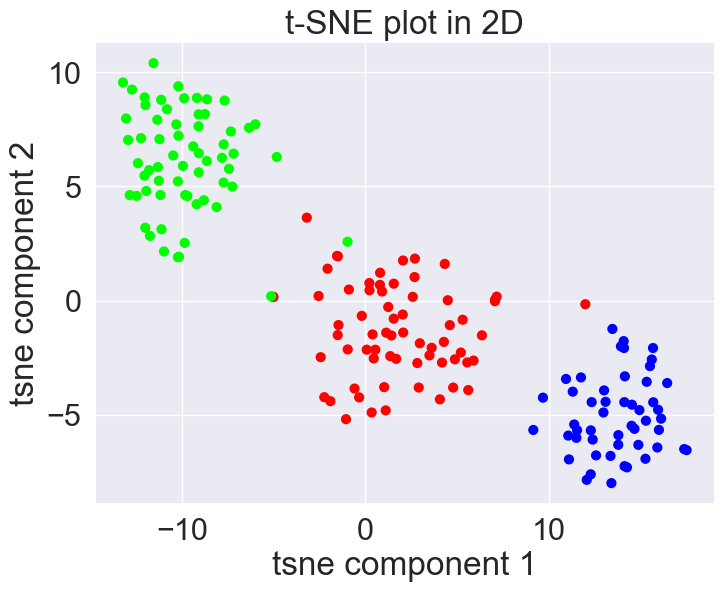

In [63]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

In [64]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [65]:
agg_clustering.n_clusters_

4

In [66]:
(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

47.312

In [67]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  14.23    1.71   2.43  15.6        127        2.80     3.06         
1  13.20    1.78   2.14  11.2        100        2.65     2.76         
2  13.16    2.36   2.67  18.6        101        2.80     3.24         
3  14.37    1.95   2.50  16.8        113        3.85     3.49         
4  13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             1                    
1  2             1                    
2  2             1                    
3  2             1                    
4  2             1

In [68]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548  92.000000    
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417  98.541667    
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419  1.959194   0.370645      1.529516         
1                    2.821385  2.942154   0.283077      1.946923         
2                    1.681667  0.788542   0.455833      1.167708         
3                    3.036667  3.550000   0.383333      1.916667         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000  497.564516   97.403226    
1                    5.378308  1.070308  3.124308  1072.276923  35.400000    
2                    7.410833  0.684375  1.698542  627.500000   153.520833   
3                    4.310000  1.123333  3.463333  760.000000   74.000000    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.967742     
1                    1.923077     
2                    0.000000     
3                    1.666667

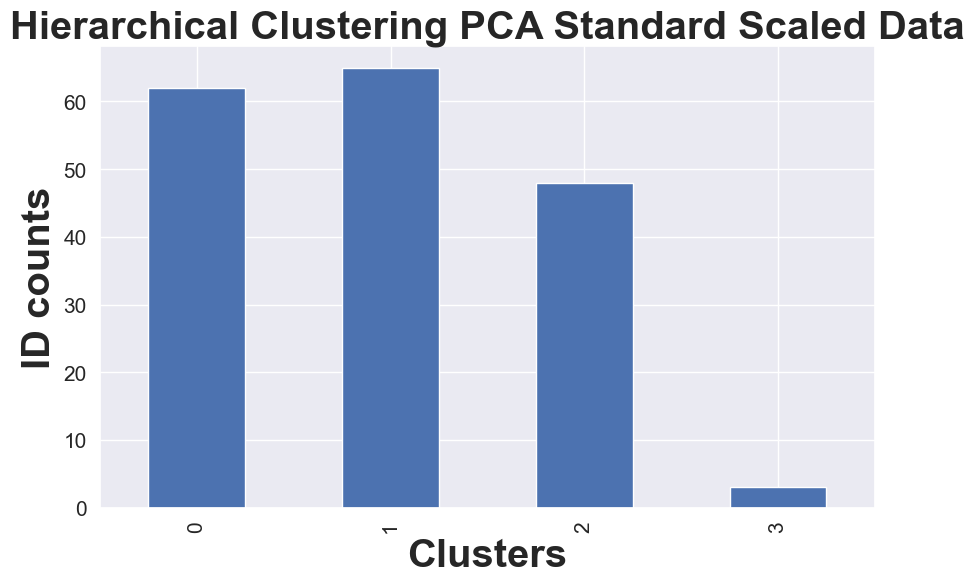

In [69]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

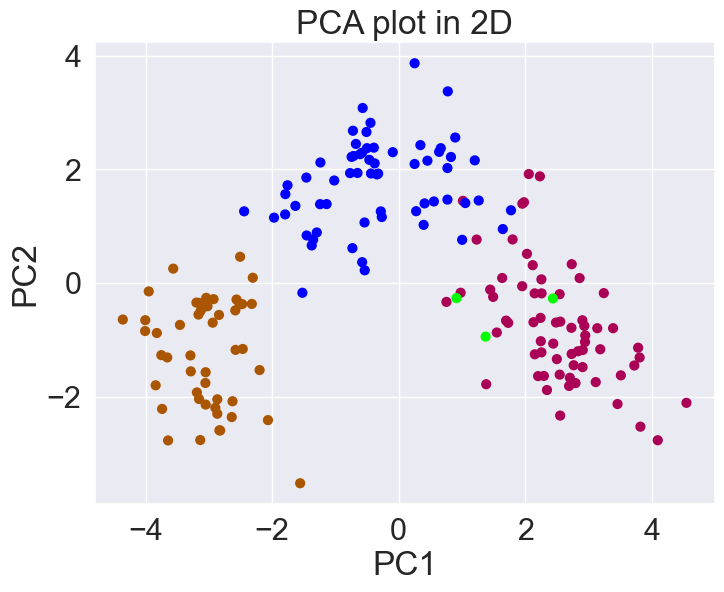

In [70]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

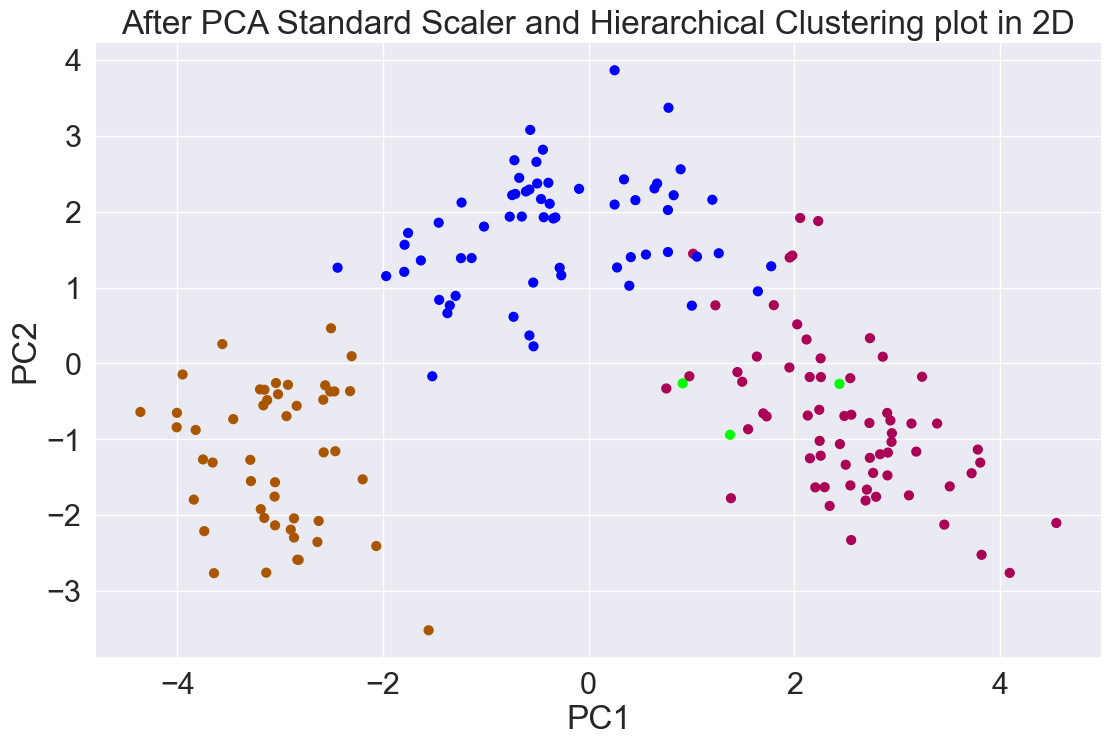

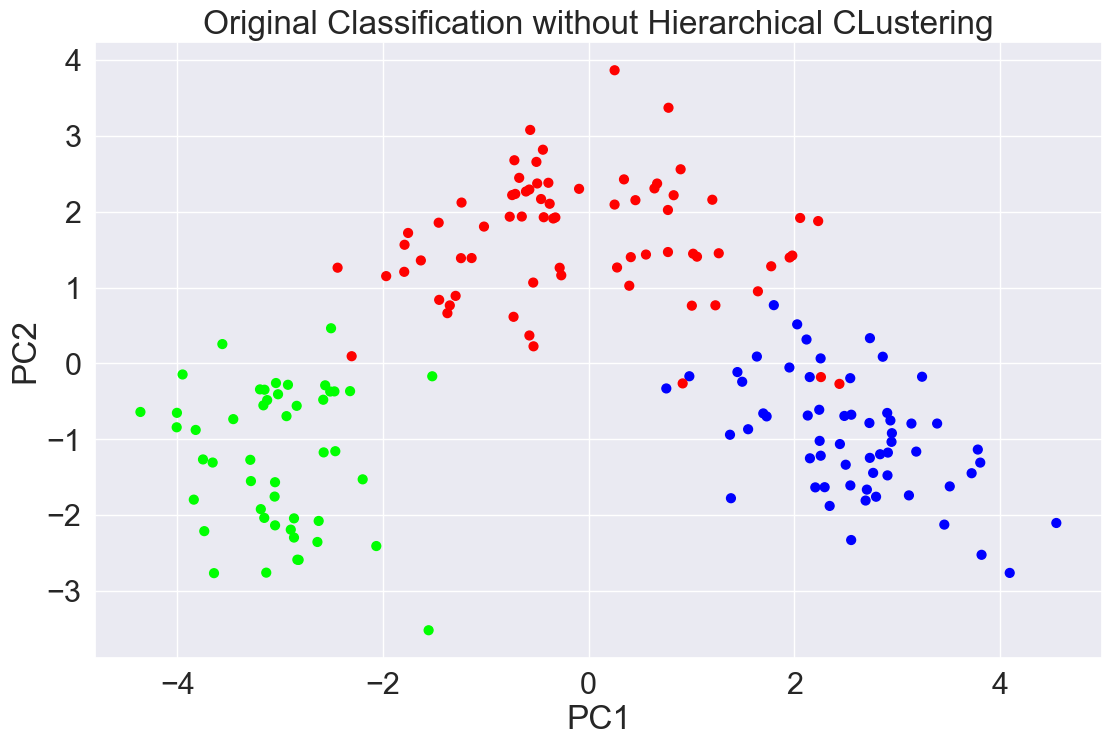

In [71]:
# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [72]:
# Group data by Clusters (Clusters=4)
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548  92.000000    
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417  98.541667    
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419  1.959194   0.370645      1.529516         
1                    2.821385  2.942154   0.283077      1.946923         
2                    1.681667  0.788542   0.455833      1.167708         
3                    3.036667  3.550000   0.383333      1.916667         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000  497.564516   97.403226    
1                    5.378308  1.070308  3.124308  1072.276923  35.400000    
2                    7.410833  0.684375  1.698542  627.500000   153.520833   
3                    4.310000  1.123333  3.463333  760.000000   74.000000    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.967742     
1                    1.923077     
2                    0.000000     
3                    1.666667

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.0          
2     519.507042   95.0   1.0          
3     629.895833   154.5  0.0

Observation:
As you can see the most of the data is in the first three clusters and very little amount of data in the last cluster so it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

In [73]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [74]:
agg_clustering.n_clusters_

3

In [75]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

51.639

In [76]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  14.23    1.71   2.43  15.6        127        2.80     3.06         
1  13.20    1.78   2.14  11.2        100        2.65     2.76         
2  13.16    2.36   2.67  18.6        101        2.80     3.24         
3  14.37    1.95   2.50  16.8        113        3.85     3.49         
4  13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             2                    
1  2             2                    
2  2             2                    
3  2             2                    
4  2             2

In [77]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563  93.890625    
1                    13.157708  3.386042  2.437083  21.510417  98.541667    
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969  1.987656   0.372812      1.565781         
1                    1.681667  0.788542   0.455833      1.167708         
2                    2.874242  2.971970   0.282879      1.923030         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875  503.125000   97.578125    
1                    7.410833  0.684375  1.698542  627.500000   153.520833   
2                    5.347879  1.073636  3.144697  1070.106061  35.106061    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.968750     
1                    0.000000     
2                    1.939394

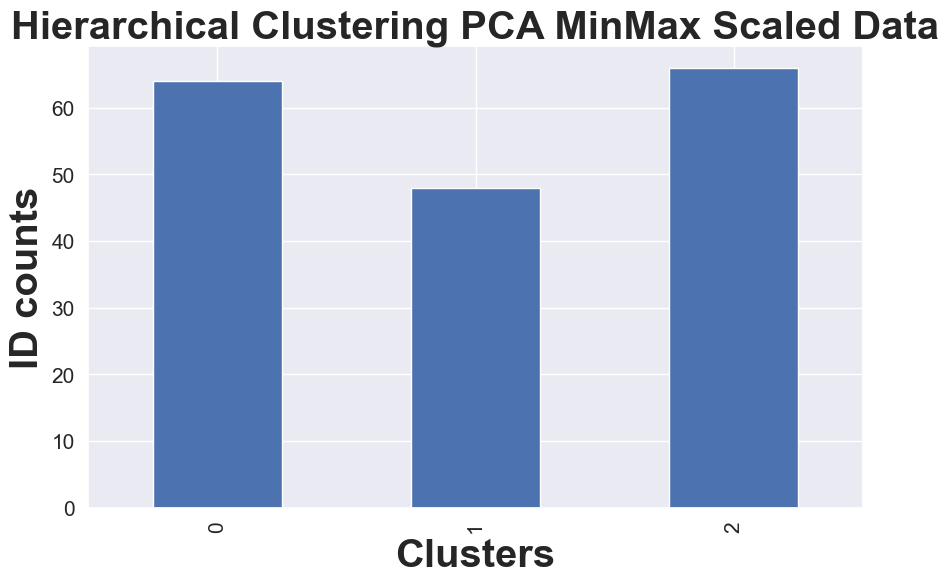

In [78]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

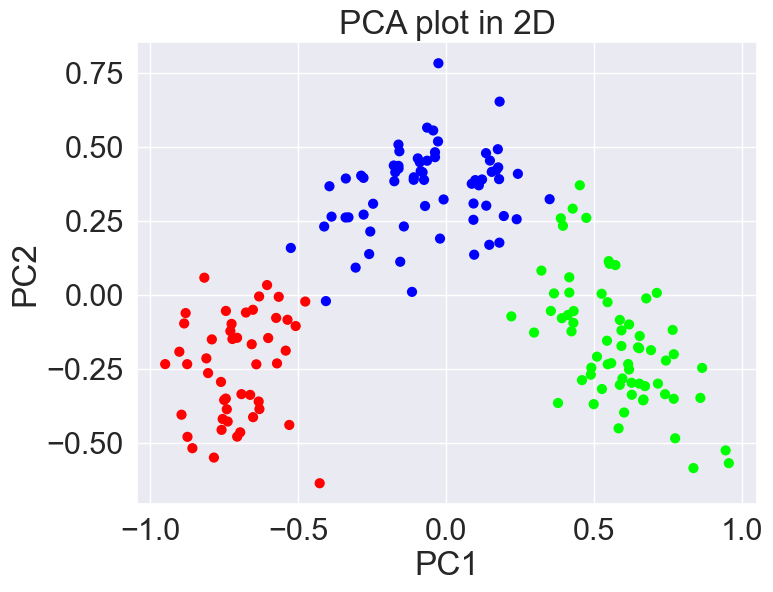

In [79]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [80]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type             2.9600        2.000000      1.048387    
Alcohol          13.1440       12.233333     13.701774   
Malic            3.3462        1.905000      1.981129    
Ash              2.4256        2.251212      2.441613    
Alcalinity       21.3300       20.218182     17.245161   
Magnesium        98.6400       93.469697     107.306452  
Phenols          1.6772        2.247273      2.844355    
Flavanoids       0.8070        2.069091      2.972581    
Nonflavanoids    0.4504        0.363485      0.288710    
Proanthocyanins  1.1564        1.602727      1.928710    
Color            7.2644        3.025758      5.442258    
Hue              0.6862        1.058576      1.068548    
Dilution         1.6988        2.792727      3.155161    
Proline          622.4400      508.696970    1100.822581 
ID               152.3800      95.530303     32.370968   
Kmeans_label     0.0000        1.000000      1.983871    
Cluster          0.0000        1.000000      2.000000

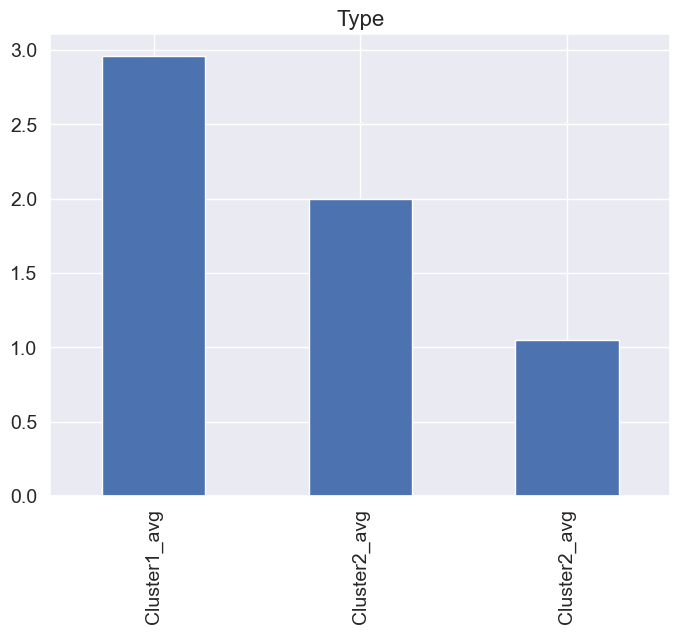

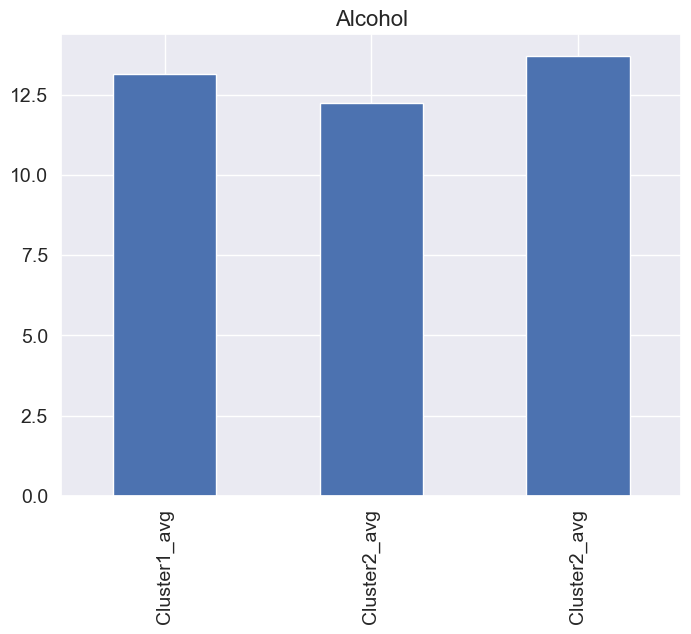

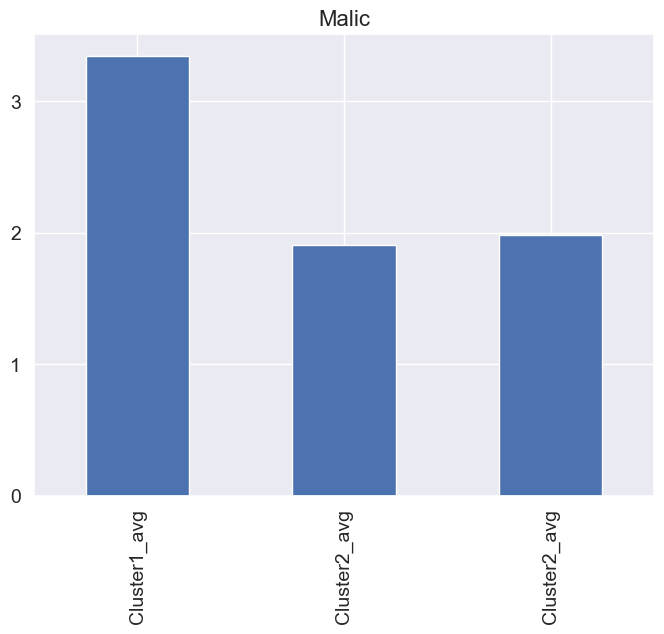

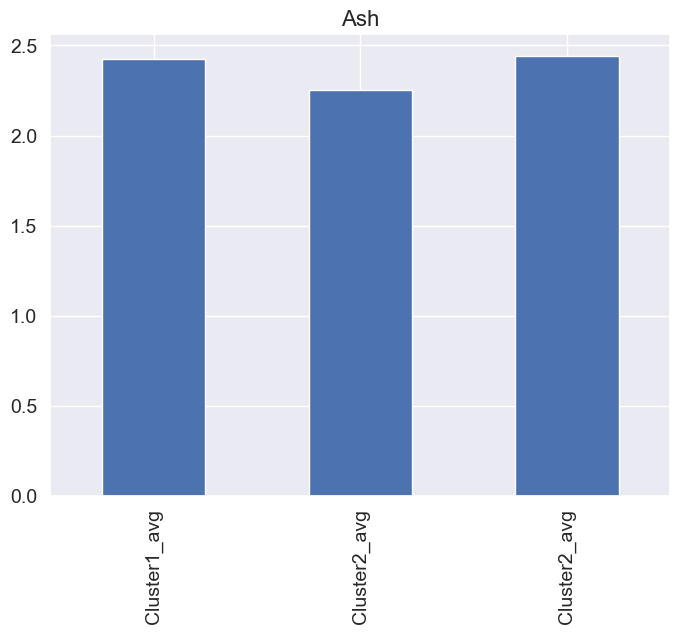

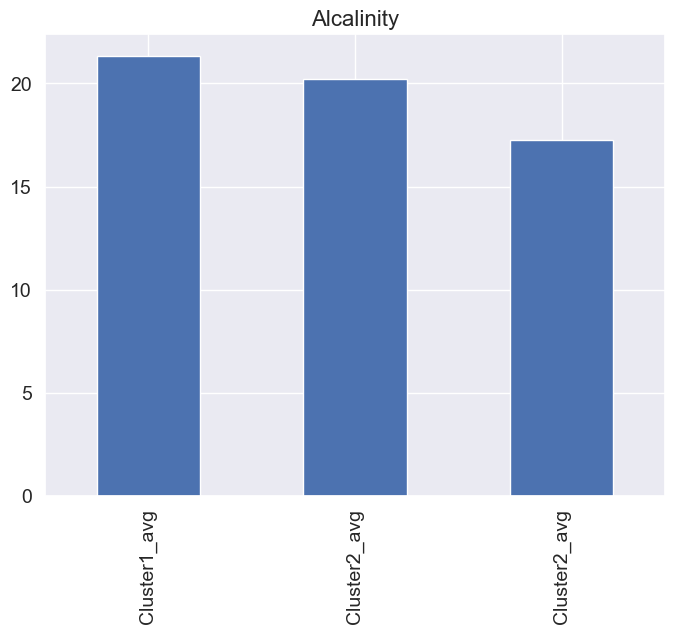

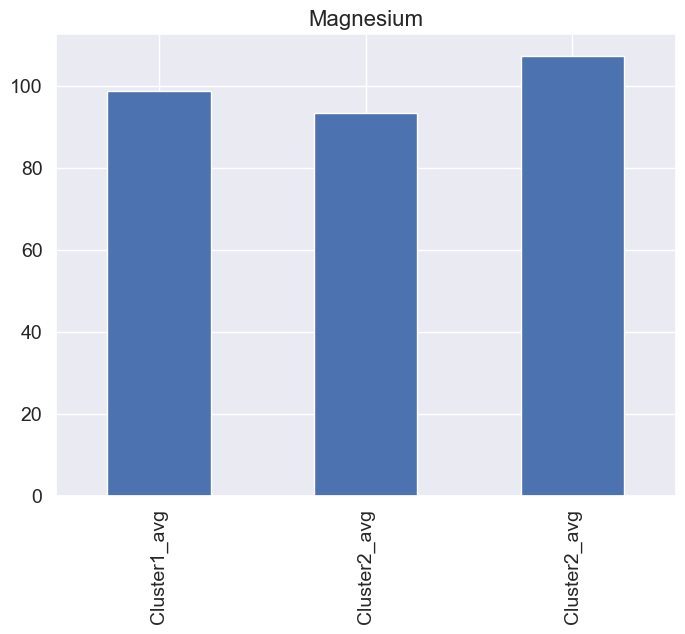

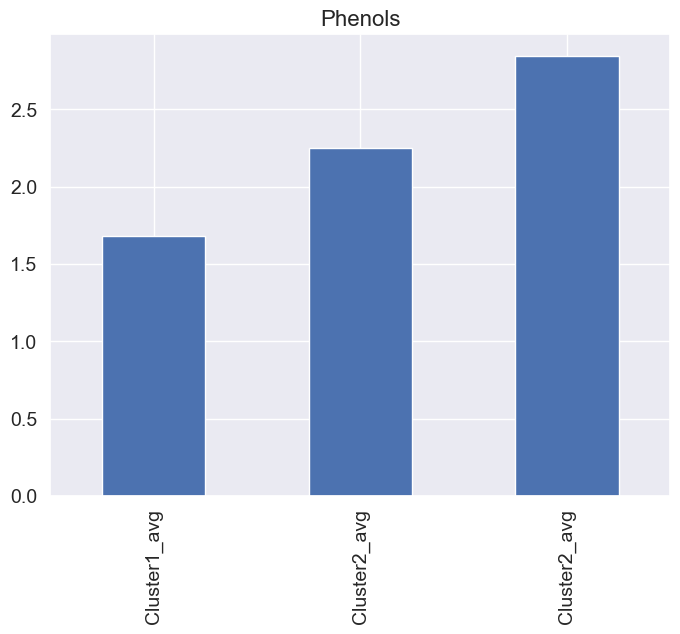

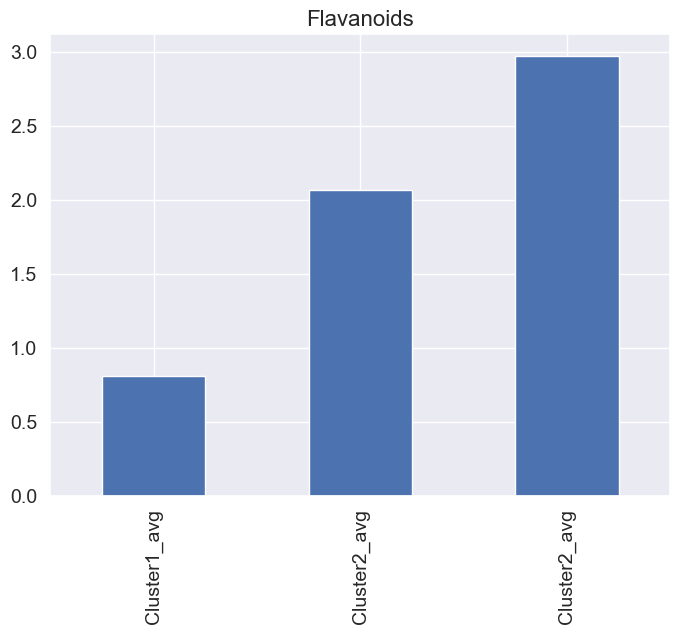

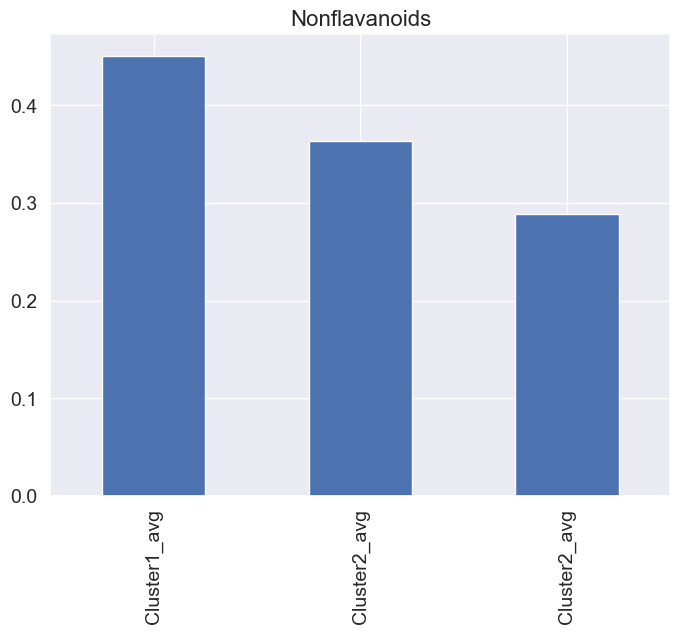

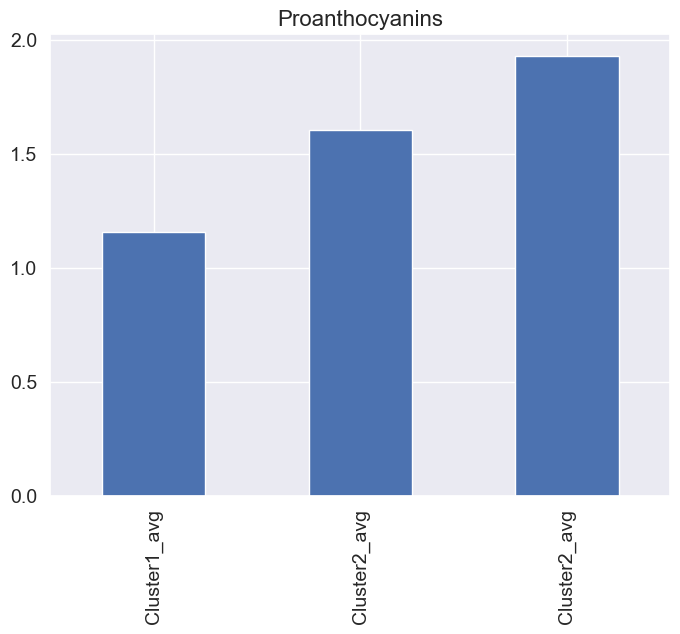

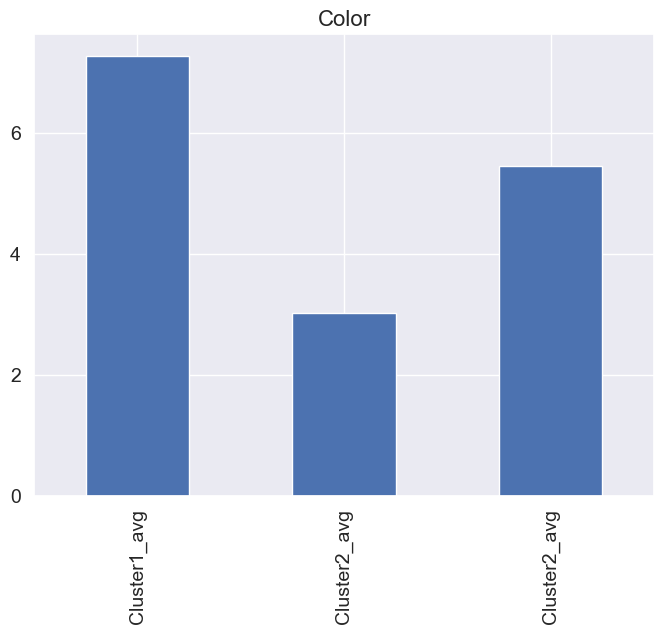

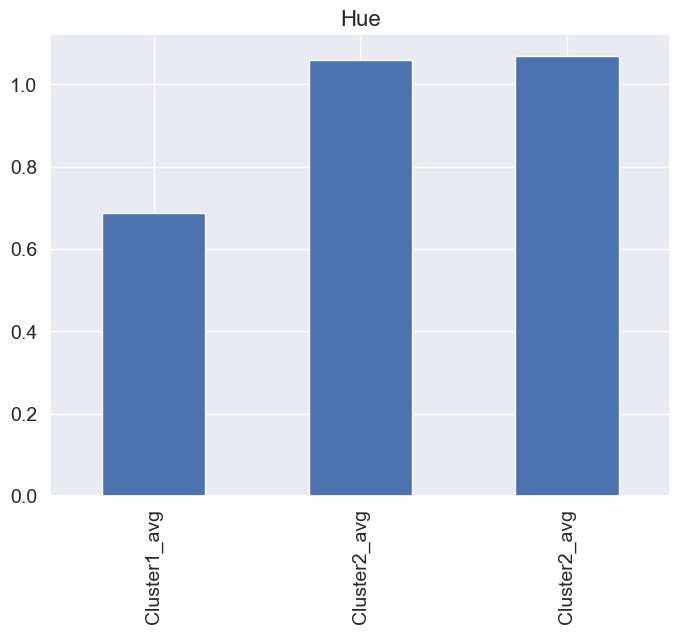

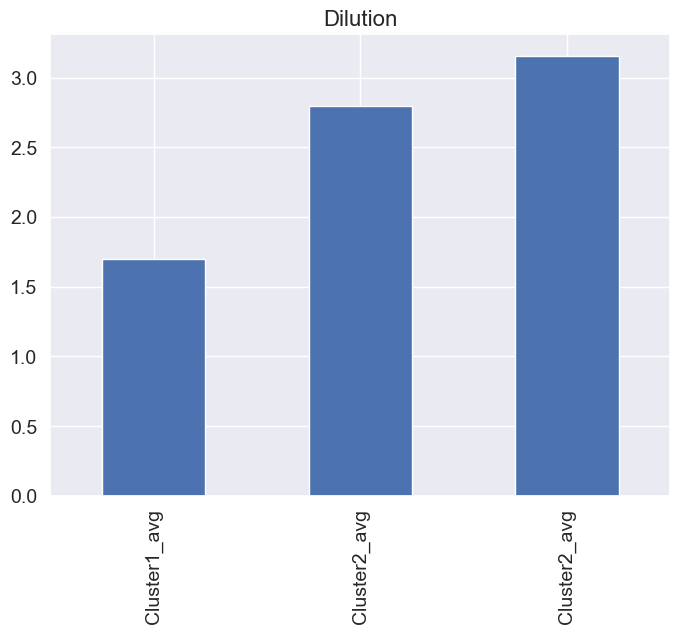

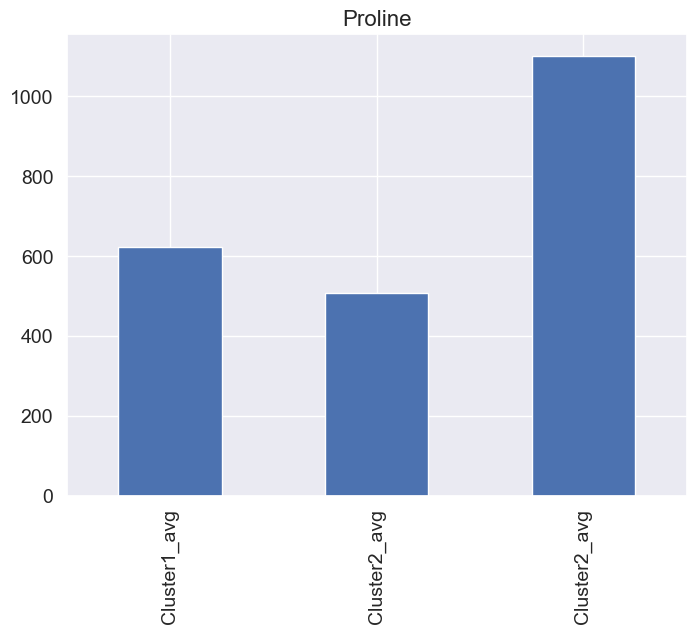

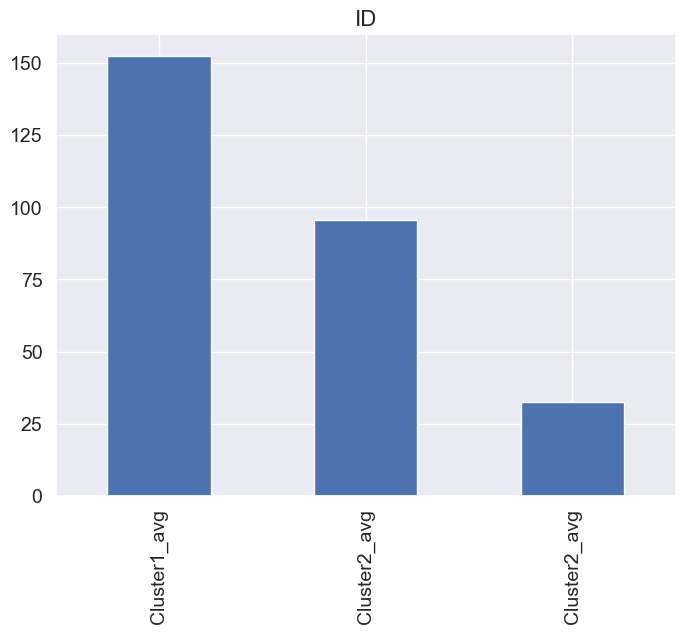

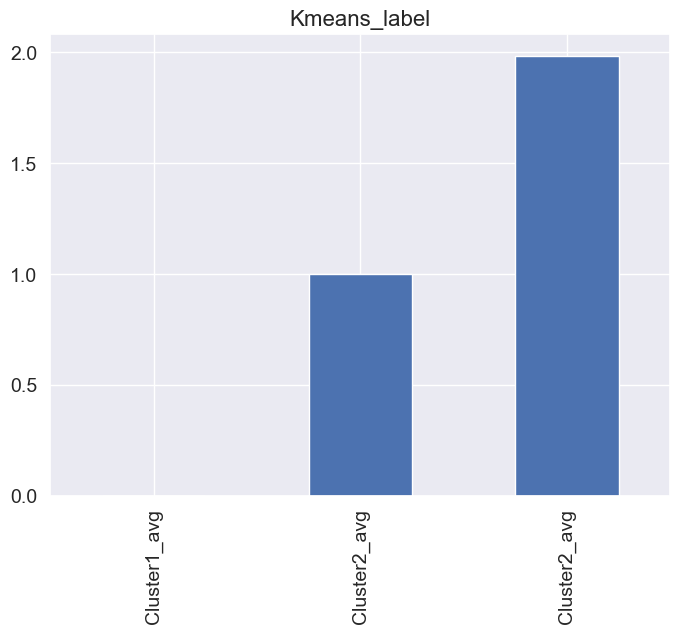

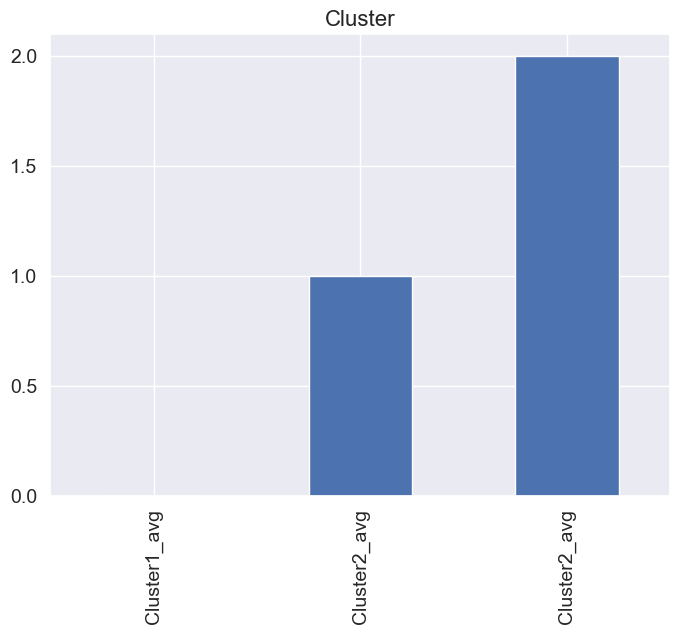

In [81]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

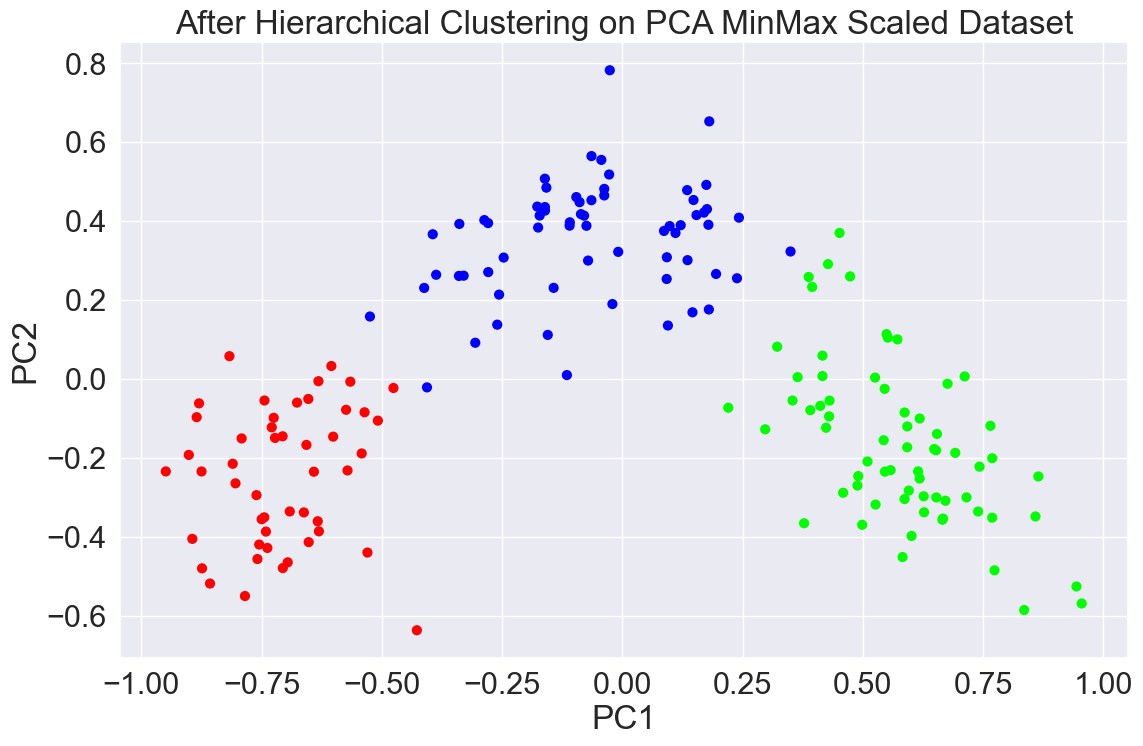

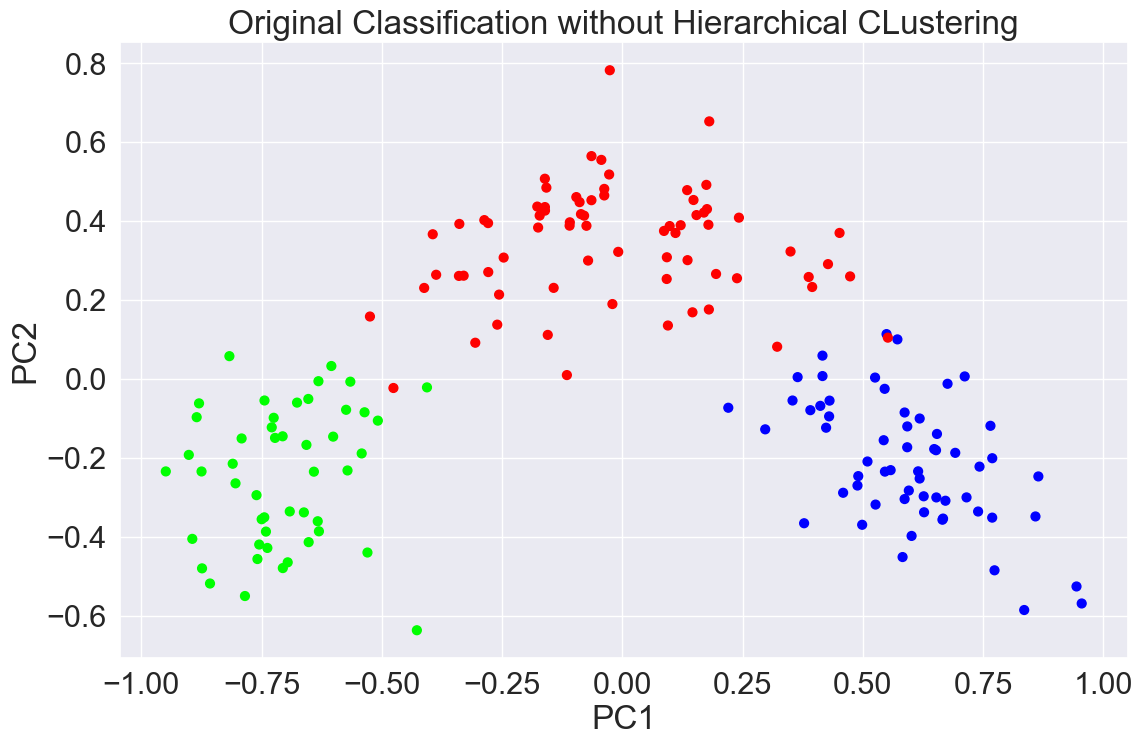

In [82]:
# Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [83]:
# Group data by Clusters (K=3)
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563  93.890625    
1                    13.157708  3.386042  2.437083  21.510417  98.541667    
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969  1.987656   0.372812      1.565781         
1                    1.681667  0.788542   0.455833      1.167708         
2                    2.874242  2.971970   0.282879      1.923030         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875  503.125000   97.578125    
1                    7.410833  0.684375  1.698542  627.500000   153.520833   
2                    5.347879  1.073636  3.144697  1070.106061  35.106061    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.968750     
1                    0.000000     
2                    1.939394

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.0          
2     519.507042   95.0   1.0          
3     629.895833   154.5  0.0

Observation:
The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature
We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column